In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('cleaned_shark.csv')

In [3]:
df.head()

Unnamed: 0                                        description  \
0           0             Bluetooth device implant for your ear.   
1           1  Retail and wholesale pie factory with two reta...   
2           2  Ava the Elephant is a godsend for frazzled par...   
3           3  Organizing, packing, and moving services deliv...   
4           4  One of the first entrepreneurs to pitch on Sha...   

              category                entrepreneurs location  website  \
0            Novelties               Darrin Johnson       MN        0   
1       Specialty Food                   Tod Wilson       NJ        1   
2  Baby and Child Care              Tiffany Krumins       GA        1   
3    Consumer Services  Nick Friedman, Omar Soliman       FL        1   
4       Specialty Food                  Susan Knapp       CA        1   

  website_length            shark1           shark2         shark3  ...  \
0          short  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  ...   
1          short  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  ...   
2         medium  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  ...   
3         medium  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  ...   
4         medium  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  ...   

  shark_group                        title episode-season  deal episode  \
0           1                    Ionic Ear            1-1     0       1   
1           1        Mr. Tod's Pie Factory            1-1     1       1   
2           1             Ava the Elephant            1-1     1       1   
3           1  College Foxes Packing Boxes            1-1     0       1   
4           1               A Perfect Pear            1-2     1       2   

  askedFor  exchangeForStake  valuation  season  Multiple_Entreprenuers  
0  1000000                15    6666667       1                       0  
1   460000                10    4600000       1                       0  
2    50000                15     333333       1                       0  
3   250000                25    1000000       1                       0  
4   500000                15    3333333       1                       0  

[5 rows x 23 columns]

In [4]:
dict(df.category.value_counts())

{'Specialty Food': 59,
 'Novelties': 31,
 'Baby and Child Care': 23,
 'Personal Care and Cosmetics': 19,
 'Online Services': 18,
 'Storage and Cleaning Products': 17,
 'Toys and Games': 15,
 'Consumer Services': 12,
 'Kitchen Tools': 11,
 'Pet Products': 11,
 'Outdoor Recreation': 10,
 'Electronics': 9,
 "Men and Women's Apparel": 9,
 "Baby and Children's Entertainment": 9,
 "Women's Apparel": 8,
 'Automotive': 8,
 "Baby and Children's Apparel and Accessories": 8,
 'Entertainment': 8,
 'Professional Services': 8,
 'Holiday Cheer': 7,
 'Undergarments and Basics': 7,
 'Homeopathic Remedies': 6,
 'Home Accessories': 6,
 "Women's Accessories": 6,
 'Weddings': 6,
 'Fitness Programs': 6,
 'Furniture': 5,
 "Men and Women's Shoes": 5,
 "Men's Accessories": 5,
 'Gardening': 5,
 'Home Improvement': 5,
 'Health and Well-Being': 5,
 'Non-Alcoholic Beverages': 5,
 'Fitness Apparel and Accessories': 5,
 "Men and Women's Accessories": 4,
 'Party Supplies': 4,
 "Women's Shoes": 4,
 'Music': 4,
 'Water

In [5]:
cat_key=[]
cat_val=[]
for key in dict(df.category.value_counts()).keys():
    cat_key.append(key)
for val in dict(df.category.value_counts()).values():
    cat_val.append(val)

In [6]:
cat_key=cat_key[0:15]
cat_val=cat_val[0:15]

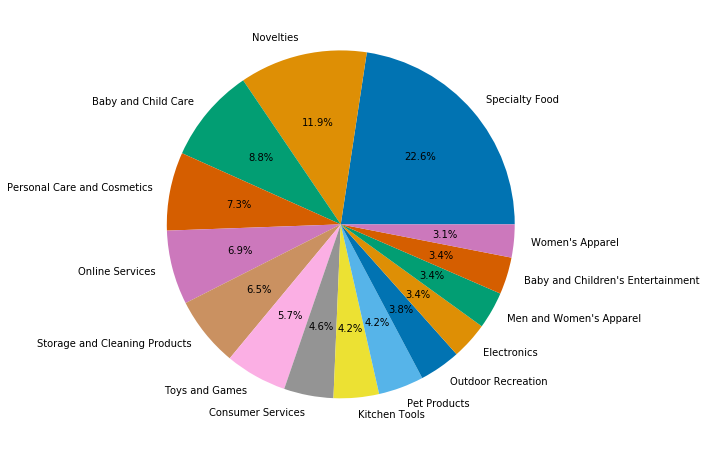

In [7]:
with sns.color_palette('colorblind'):
    plt.figure(figsize=(15,8))
    plt.pie(x=cat_val,labels=cat_key,autopct='%1.1f%%',)
    plt.show()

In [8]:
df.columns

Index(['Unnamed: 0', 'description', 'category', 'entrepreneurs', 'location',
       'website', 'website_length', 'shark1', 'shark2', 'shark3', 'shark4',
       'shark5', 'sharks', 'shark_group', 'title', 'episode-season', 'deal',
       'episode', 'askedFor', 'exchangeForStake', 'valuation', 'season',
       'Multiple_Entreprenuers'],
      dtype='object')

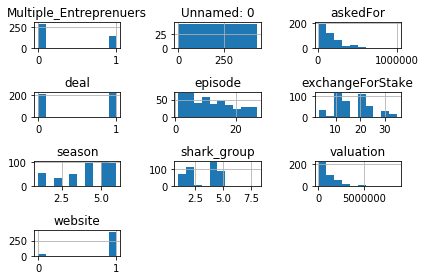

In [9]:
df.hist()
plt.tight_layout()
plt.show()

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
for col in ['askedFor','exchangeForStake','valuation']:
    df[f'{col}_bin']=pd.cut(df[col],bins=3,labels=[0,1,2])

In [12]:
df.head()

description             category  \
0             Bluetooth device implant for your ear.            Novelties   
1  Retail and wholesale pie factory with two reta...       Specialty Food   
2  Ava the Elephant is a godsend for frazzled par...  Baby and Child Care   
3  Organizing, packing, and moving services deliv...    Consumer Services   
4  One of the first entrepreneurs to pitch on Sha...       Specialty Food   

                 entrepreneurs location  website website_length  \
0               Darrin Johnson       MN        0          short   
1                   Tod Wilson       NJ        1          short   
2              Tiffany Krumins       GA        1         medium   
3  Nick Friedman, Omar Soliman       FL        1         medium   
4                  Susan Knapp       CA        1         medium   

             shark1           shark2         shark3        shark4  ... deal  \
0  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    0   
1  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   
2  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   
3  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    0   
4  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   

  episode  askedFor exchangeForStake valuation  season  \
0       1   1000000               15   6666667       1   
1       1    460000               10   4600000       1   
2       1     50000               15    333333       1   
3       1    250000               25   1000000       1   
4       2    500000               15   3333333       1   

   Multiple_Entreprenuers  askedFor_bin  exchangeForStake_bin  valuation_bin  
0                       0             2                     1              2  
1                       0             1                     0              1  
2                       0             0                     1              0  
3                       0             0                     2              0  
4                       0             1                     1              1  

[5 rows x 25 columns]

In [13]:
df[df.duplicated(subset='entrepreneurs')==True].entrepreneurs.unique()

array(['James Martin', nan, 'Dave Alwan'], dtype=object)

## Target correlations

In [14]:
a=list(dict(df.category.value_counts()))[0:20]

In [15]:
top_cat_df = df[df.category.isin(a)]

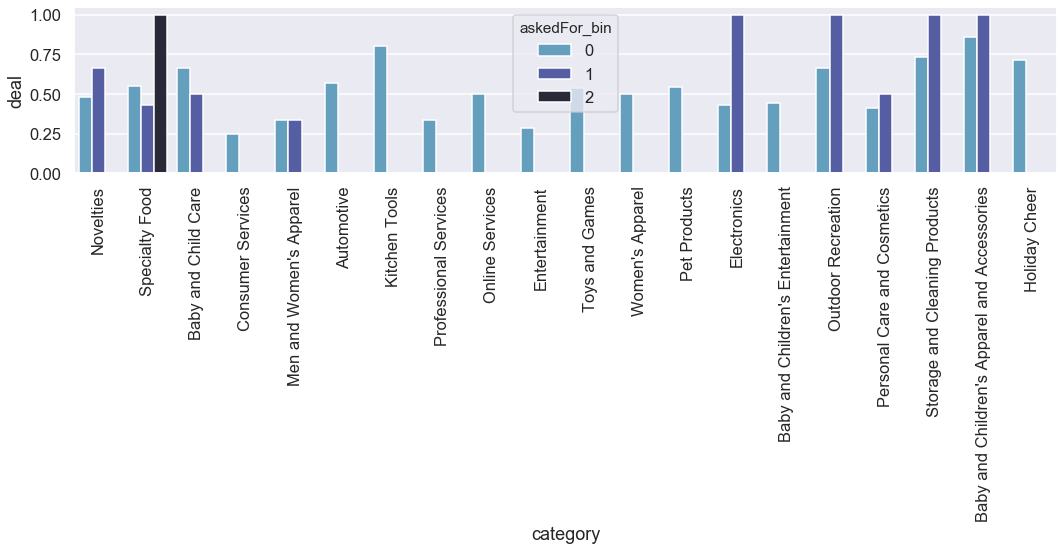

In [16]:
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('talk'):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(1,1,1)
            sns.barplot(top_cat_df.category,top_cat_df.deal,ci=None,hue=top_cat_df.askedFor_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.show()

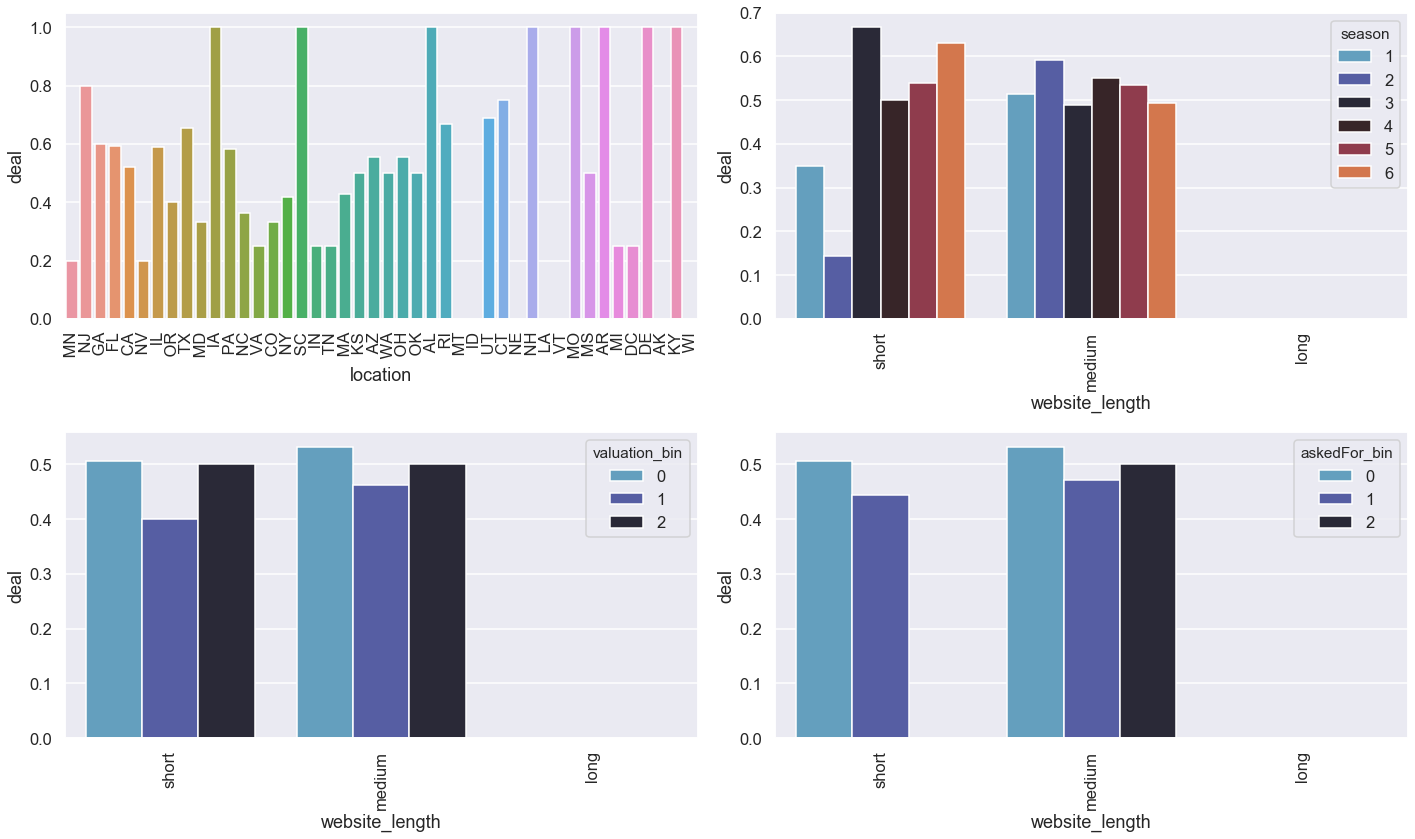

In [17]:
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('talk'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.barplot(df.location,df.deal,ci=None)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,2)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.season)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,3)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.valuation_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,4)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.askedFor_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.show()

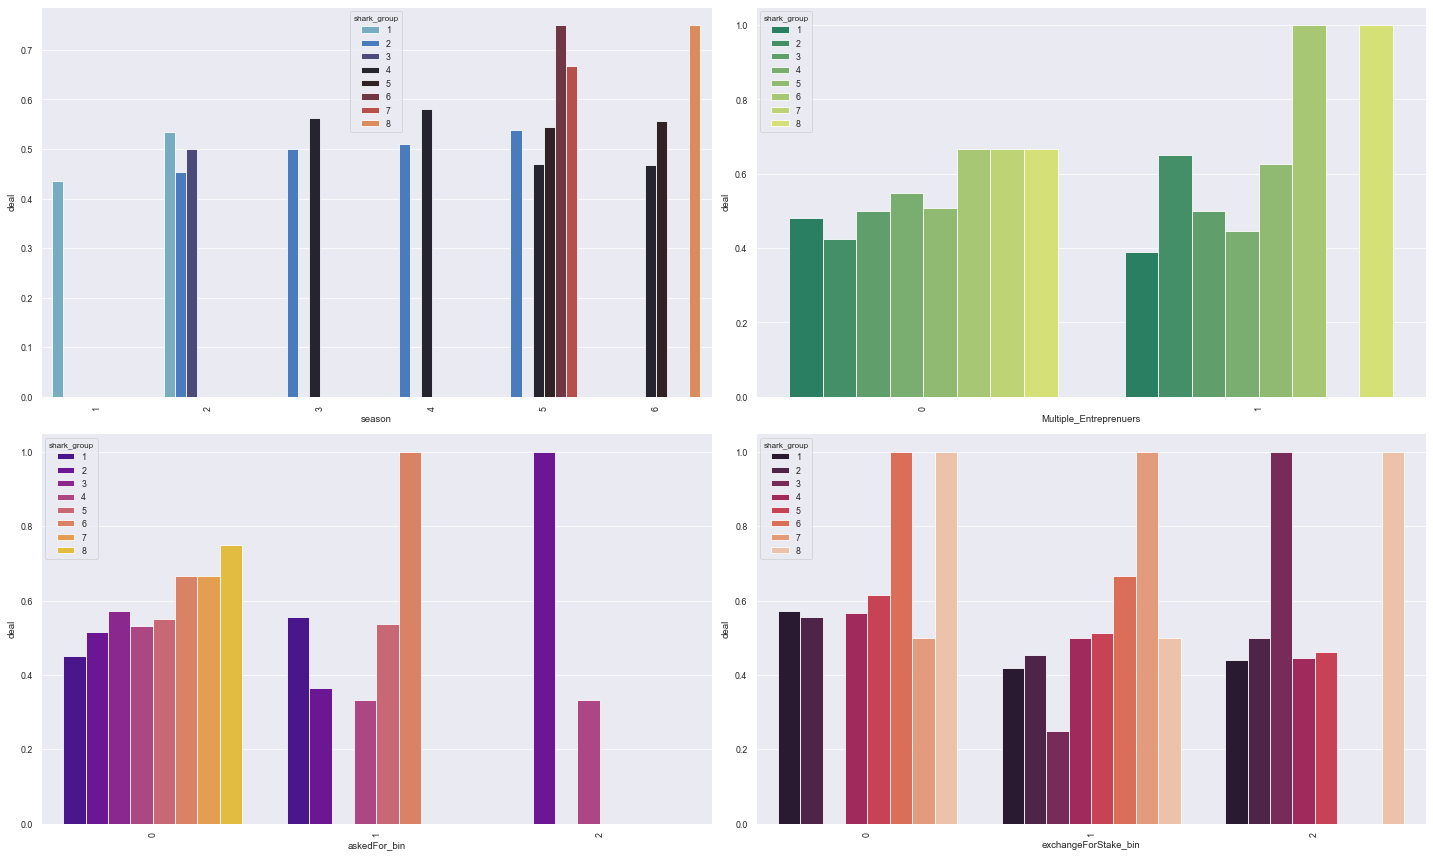

In [18]:
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('paper'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.barplot(df.season,df.deal,ci=None,hue=df.shark_group,palette='icefire')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,2)
            sns.barplot(df.Multiple_Entreprenuers,df.deal,ci=None,hue=df.shark_group,palette='summer')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,3)
            sns.barplot(df.askedFor_bin,df.deal,ci=None,hue=df.shark_group,palette='plasma')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,4)
            sns.barplot(df.exchangeForStake_bin,df.deal,ci=None,hue=df.shark_group,palette='rocket')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.show()

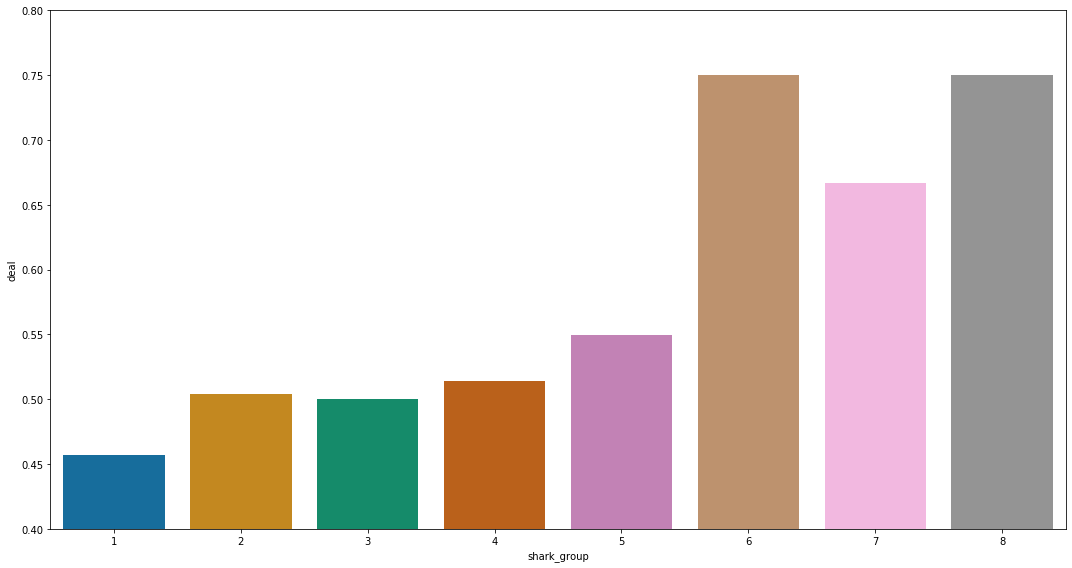

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(df.shark_group,df.deal,ci=False,palette='colorblind')
plt.ylim(0.4,0.8)
plt.tight_layout()
plt.show()

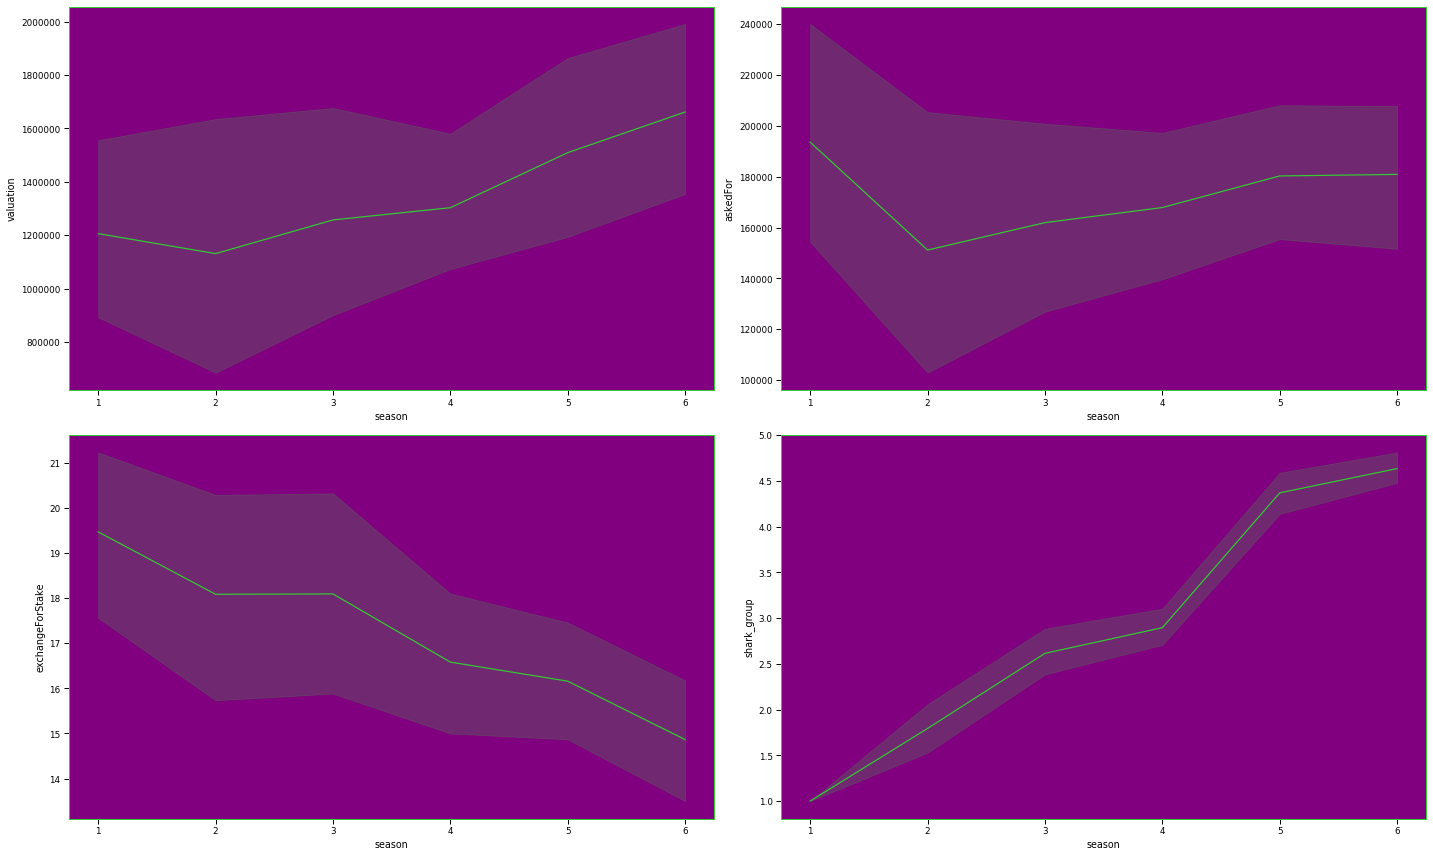

In [20]:
with sns.axes_style({'axes.facecolor':'purple','axes.edgecolor':'limegreen'}):
    with sns.plotting_context('paper'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.lineplot(df.season,df.valuation,color='limegreen')
            plt.tight_layout()
            
            plt.subplot(2,2,2)
            sns.lineplot(df.season,df.askedFor,color='limegreen')
            plt.tight_layout()

            plt.subplot(2,2,3)
            sns.lineplot(df.season,df.exchangeForStake,color='limegreen')
            plt.tight_layout()
            
            plt.subplot(2,2,4)
            sns.lineplot(df.season,df.shark_group,color='limegreen')
            plt.tight_layout()
            
            plt.show()

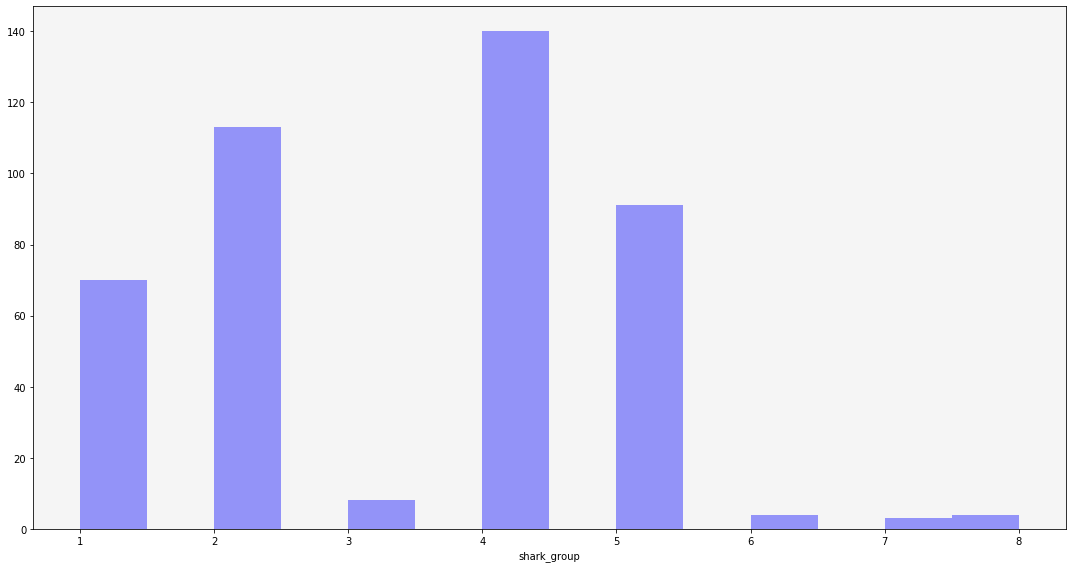

In [21]:
with sns.axes_style({'axes.facecolor':'whitesmoke'}):

    plt.figure(figsize=(15,8))

    sns.distplot(df.shark_group,kde=False,color='blue')
    
    plt.tight_layout()

    plt.show()

## Now, I will set up some data to see trends over the seasons

In [22]:
s1 = df[df.season==1]
s2 = df[df.season==2]
s3 = df[df.season==3]
s4 = df[df.season==4]
s5 = df[df.season==5]
s6 = df[df.season==6]

In [23]:
s1.describe()

website  shark_group       deal    episode        askedFor  \
count  55.000000         55.0  55.000000  55.000000       55.000000   
mean    0.709091          1.0   0.436364   7.181818   193618.181818   
std     0.458368          0.0   0.500505   4.114522   171036.328273   
min     0.000000          1.0   0.000000   1.000000    30000.000000   
25%     0.000000          1.0   0.000000   4.000000    77500.000000   
50%     1.000000          1.0   0.000000   7.000000   150000.000000   
75%     1.000000          1.0   1.000000  11.000000   250000.000000   
max     1.000000          1.0   1.000000  14.000000  1000000.000000   

       exchangeForStake     valuation  season  Multiple_Entreprenuers  
count         55.000000  5.500000e+01    55.0               55.000000  
mean          19.472727  1.205598e+06     1.0                0.290909  
std            6.882222  1.289079e+06     0.0                0.458368  
min           10.000000  1.000000e+05     1.0                0.000000  
25%           15.000000  4.650000e+05     1.0                0.000000  
50%           20.000000  7.575760e+05     1.0                0.000000  
75%           25.000000  1.416666e+06     1.0                1.000000  
max           35.000000  6.666667e+06     1.0                1.000000

In [24]:
df_s = pd.DataFrame(columns=['season','pitches','deal_mean','askedFor_mean','askedFor_max','askedFor_min',
                            'stake_mean','stake_max','stake_min',
                            'value_mean','value_max','value_min'])

In [25]:
ss=[s1.describe(),s2.describe(),s3.describe(),s4.describe(),s5.describe(),s6.describe()]

In [26]:
for col in df_s.columns:
    df_s[col]=df_s[col].astype(float)
    df_s[col]=4

In [27]:
df_s.pitches=[4,4,4,4,4,4]

In [28]:
df_s

season  pitches  deal_mean  askedFor_mean  askedFor_max  askedFor_min  \
0     NaN        4        NaN            NaN           NaN           NaN   
1     NaN        4        NaN            NaN           NaN           NaN   
2     NaN        4        NaN            NaN           NaN           NaN   
3     NaN        4        NaN            NaN           NaN           NaN   
4     NaN        4        NaN            NaN           NaN           NaN   
5     NaN        4        NaN            NaN           NaN           NaN   

   stake_mean  stake_max  stake_min  value_mean  value_max  value_min  
0         NaN        NaN        NaN         NaN        NaN        NaN  
1         NaN        NaN        NaN         NaN        NaN        NaN  
2         NaN        NaN        NaN         NaN        NaN        NaN  
3         NaN        NaN        NaN         NaN        NaN        NaN  
4         NaN        NaN        NaN         NaN        NaN        NaN  
5         NaN        NaN        NaN         NaN        NaN        NaN

In [29]:
i = 0
for dfr in ss:
    
    df_s.season[i]=i
    df_s.pitches[i]=dfr.website[0]
    df_s.deal_mean[i]=dfr.deal[1]
    df_s.askedFor_mean[i]=dfr.askedFor[1]
    df_s.askedFor_max[i]=dfr.askedFor[7]
    df_s.askedFor_min[i]=dfr.askedFor[3]
    df_s.stake_mean[i]=dfr.exchangeForStake[1]
    df_s.stake_max[i]=dfr.exchangeForStake[7]
    df_s.stake_min[i]=dfr.exchangeForStake[3]
    df_s.value_mean[i]=dfr.valuation[1]
    df_s.value_max[i]=dfr.valuation[7]
    df_s.value_min[i]=dfr.valuation[3]
    i = i+1

In [30]:
df_s

season  pitches  deal_mean  askedFor_mean  askedFor_max  askedFor_min  \
0     0.0       55   0.436364  193618.181818     1000000.0       30000.0   
1     1.0       34   0.500000  151176.470588      500000.0       25000.0   
2     2.0       52   0.519231  161961.538462      540000.0       10000.0   
3     3.0       96   0.541667  167906.250000     1000000.0       25000.0   
4     4.0      100   0.530000  180330.000000      700000.0       10000.0   
5     5.0       96   0.520833  180937.500000      750000.0       20000.0   

   stake_mean  stake_max  stake_min    value_mean  value_max  value_min  
0   19.472727       35.0       10.0  1.205598e+06  6666667.0   100000.0  
1   18.088235       30.0        5.0  1.130735e+06  6000000.0   125000.0  
2   18.096154       35.0        3.0  1.256879e+06  6666667.0    40000.0  
3   16.583333       35.0        5.0  1.302738e+06  8333333.0   100000.0  
4   16.160000       33.0        3.0  1.508961e+06  8600000.0   100000.0  
5   14.864583       35.0        4.0  1.661149e+06  7500000.0   100000.0

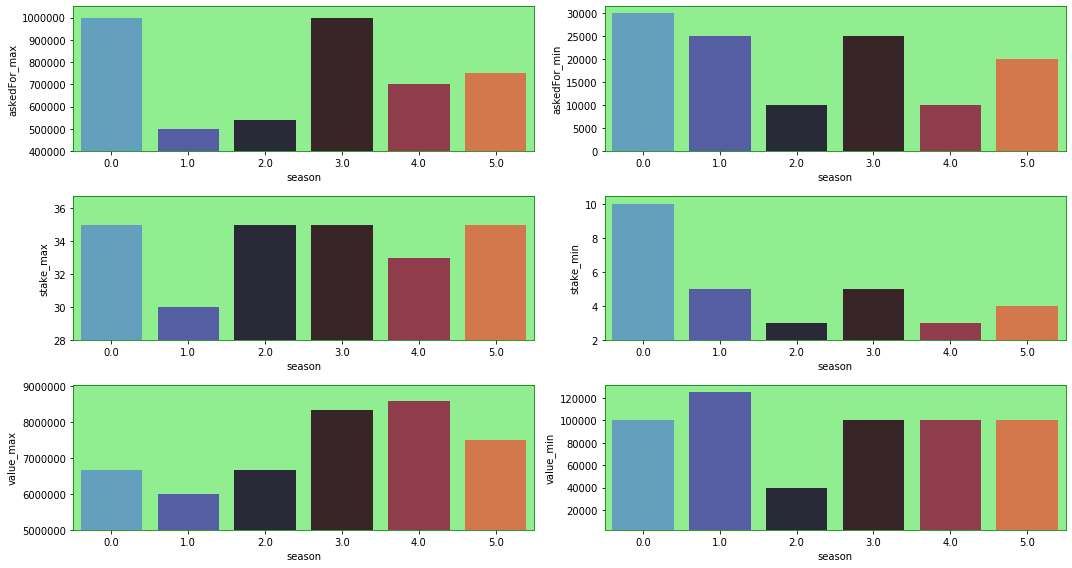

In [31]:
with sns.color_palette('icefire'):
    with sns.axes_style({'axes.facecolor':'lightgreen','axes.edgecolor':'green'}):

        plt.figure(figsize=(15,8))

        plt.subplot(3,2,1)
        sns.barplot(df_s.season,df_s.askedFor_max)
        plt.tight_layout()
        plt.ylim(400000)

        plt.subplot(3,2,2)
        sns.barplot(df_s.season,df_s.askedFor_min)
        plt.tight_layout()

        plt.subplot(3,2,3)
        sns.barplot(df_s.season,df_s.stake_max)
        plt.tight_layout()
        plt.ylim(28,)

        plt.subplot(3,2,4)
        sns.barplot(df_s.season,df_s.stake_min)
        plt.tight_layout()
        plt.ylim(2,)

        plt.subplot(3,2,5)
        sns.barplot(df_s.season,df_s.value_max)
        plt.tight_layout()
        plt.ylim(5000000)

        plt.subplot(3,2,6)
        sns.barplot(df_s.season,df_s.value_min)
        plt.tight_layout()
        plt.ylim(2500)

        plt.show()

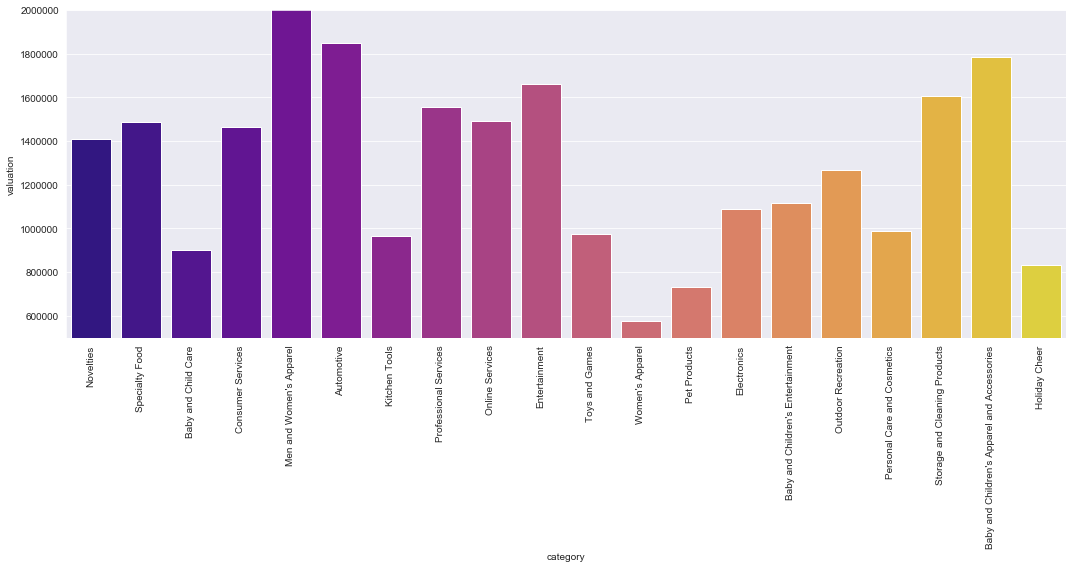

In [32]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,8))
    sns.barplot(top_cat_df.category,top_cat_df.valuation,palette='plasma',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(500000,2*10**6)
    plt.tight_layout()
    plt.show()

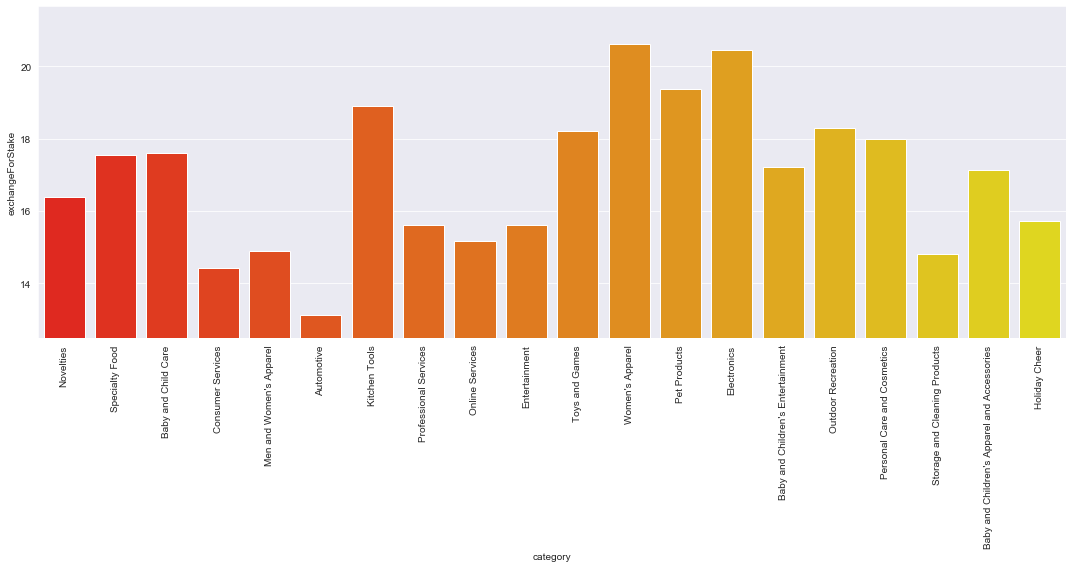

In [33]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,8))
    sns.barplot(top_cat_df.category,top_cat_df.exchangeForStake,palette='autumn',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(12.5)
    plt.tight_layout()
    plt.show()

In [34]:
df.sharks.unique()

array(['[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Kevin Harrington\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Jeff Foxworthy\', \'Daymond John\']',
       '[\'Lori Greiner\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', \'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'John Paul DeJoria\']',
       '[\'Lori Greiner\', \'Steve Tisch\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'Nick Woodman\']'],
      dtype=object)

In [35]:
no_guest=df[df.shark_group.isin([1,2,4,5])]

In [36]:
guest_shark = df[df.shark_group.isin([3,6,7,8])]

In [37]:
guest_shark
# deal asked for stake valuation

description  \
67   A country-style apparel store sold through Spo...   
68   A children's seat attachable to luggage that i...   
69   Premium beef jerky made without additives or p...   
70           A rubber band that works as a money clip.   
79   An impact-resistant hydration system that atta...   
80   A mobile entertainment company running special...   
81   A barf bag worn around the neck, for small chi...   
82   A push mower marketed as a more eco-friendly a...   
259         An all-electric, jet-propelled body board.   
260  Tree T Pee is an agricultural water conservati...   
261  180CUP is the party time MVP. Just a normal pl...   
262  Better Life produces all-natural cleaning prod...   
294  The Cycloramic app cleverly makes use of your ...   
295  Single-serve milk treat for kids, flavored to ...   
296  Gourmet cookie dough made to be eaten and enjo...   
369  Earthlogs are the environmentally-conscious ch...   
370  With Magic Cook, users can make a meal without...   
371  The Kitchen Safe is a smart container that hel...   
372  Off the Cob makes premium-quality tortilla chi...   

                            category                     entrepreneurs  \
67           Men and Women's Apparel      Mike Abbaticchio & Shon Lees   
68               Baby and Child Care             Darryl and Randy Lenz   
69                    Specialty Food                        Ken Howell   
70                         Novelties    Johnny Gennaro & Vinny Pastore   
79   Fitness Apparel and Accessories                     Chris Spencer   
80                     Entertainment           Stuart and David Pikoff   
81               Baby and Child Care                       Les Cookson   
82                         Gardening                     Andy Humphrey   
259               Outdoor Recreation                               NaN   
260                        Gardening          John (Johnny) G. Georges   
261                   Party Supplies                               NaN   
262    Storage and Cleaning Products      Tim Barklage and Kevin Tibbs   
294                      Mobile Apps                               NaN   
295         Baby and Children's Food                               NaN   
296                   Specialty Food                               NaN   
369                 Home Accessories                       Tom Sanetti   
370               Outdoor Recreation                         Sharon Yu   
371    Storage and Cleaning Products  David Krippendorf and Ryan Tseng   
372                   Specialty Food                 Cameron Sheldrake   

    location  website website_length            shark1           shark2  \
67        FL        1         medium  Barbara Corcoran  Robert Herjavec   
68        GA        1         medium  Barbara Corcoran  Robert Herjavec   
69        NC        1         medium  Barbara Corcoran  Robert Herjavec   
70        NY        1         medium  Barbara Corcoran  Robert Herjavec   
79        TX        1         medium  Barbara Corcoran  Robert Herjavec   
80        TX        1          short  Barbara Corcoran  Robert Herjavec   
81        CA        1         medium  Barbara Corcoran  Robert Herjavec   
82        MD        1         medium  Barbara Corcoran  Robert Herjavec   
259       CA        1         medium      Lori Greiner    Kevin O'Leary   
260       FL        1         medium      Lori Greiner    Kevin O'Leary   
261       NY        1          short      Lori Greiner    Kevin O'Leary   
262       MO        1         medium      Lori Greiner    Kevin O'Leary   
294       GA        1          short      Lori Greiner      Steve Tisch   
295       CA        1          short      Lori Greiner      Steve Tisch   
296       IL        1         medium      Lori Greiner      Steve Tisch   
369       CA        1         medium      Lori Greiner    Kevin O'Leary   
370       CA        1          short      Lori Greiner    Kevin O'Leary   
371       CA        1         medium      Lori Grei

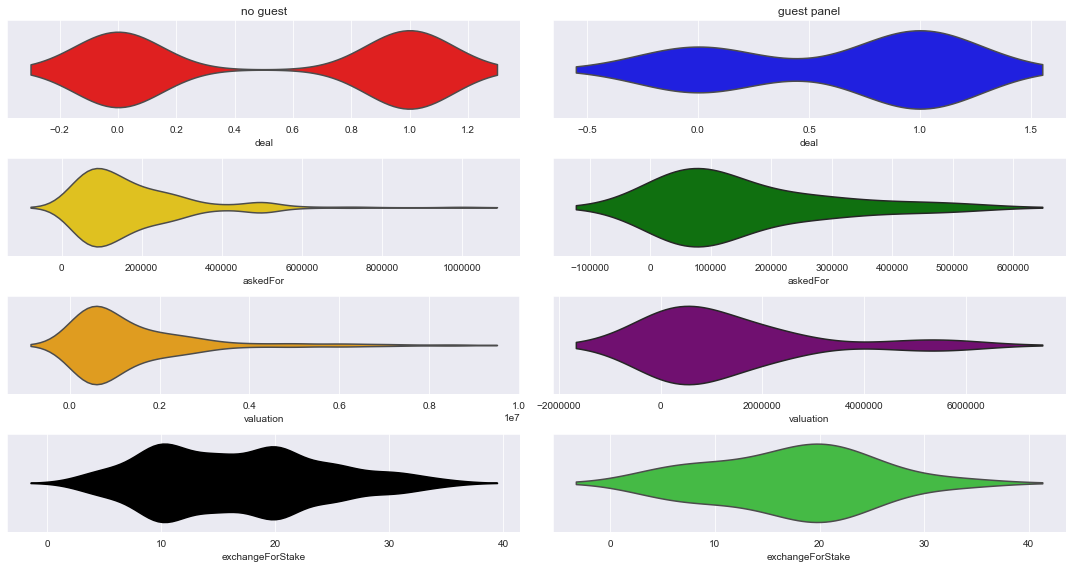

In [38]:
with sns.axes_style('darkgrid'):

    colors = ['red','blue','gold','green','orange','purple','black','limegreen']

    plt.figure(figsize=(15,8))

    plt.subplot(4,2,1)
    sns.violinplot(no_guest.deal,color=colors[0],inner=None)
    plt.tight_layout()
    plt.title('no guest')

    plt.subplot(4,2,2)
    sns.violinplot(guest_shark.deal,color=colors[1],inner=None)
    plt.tight_layout()
    plt.title('guest panel')

    plt.subplot(4,2,3)
    sns.violinplot(no_guest.askedFor,color=colors[2],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,4)
    sns.violinplot(guest_shark.askedFor,color=colors[3],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,5)
    sns.violinplot(no_guest.valuation,color=colors[4],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,6)
    sns.violinplot(guest_shark.valuation,color=colors[5],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,7)
    sns.violinplot(no_guest.exchangeForStake,color=colors[6],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,8)
    sns.violinplot(guest_shark.exchangeForStake,color=colors[7],inner=None)
    plt.tight_layout()

    plt.show()

In [39]:
df.location.value_counts()

 CA    123
 NY     36
 TX     32
 FL     27
 IL     17
 UT     16
 GA     15
 OR     15
 CO     12
 PA     12
 NC     11
 NJ     10
 OH      9
 AZ      9
 WA      8
 VA      8
 MA      7
 MN      5
 NV      5
 IN      4
 TN      4
 MO      4
 DC      4
 CT      4
 MI      4
 SC      3
 RI      3
 MD      3
 KY      2
 LA      2
 VT      2
 KS      2
 MS      2
 OK      2
 ID      2
 NH      1
 WI      1
 IA      1
 AK      1
 NE      1
 MT      1
 AL      1
 AR      1
 DE      1
Name: location, dtype: int64

In [40]:
location_key=[]
location_val=[]
for key in dict(df.location.value_counts()).keys():
    location_key.append(key)
for val in dict(df.location.value_counts()).values():
    location_val.append(val)

In [41]:
location_key=location_key[0:15]
location_val=location_val[0:15]

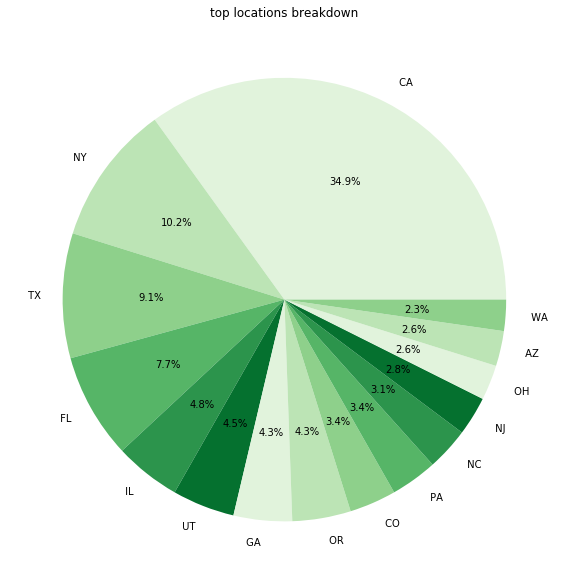

In [42]:
with sns.color_palette('Greens'):
    plt.figure(figsize=(15,8))
    plt.pie(x=location_val,labels=location_key,autopct='%1.1f%%')
    plt.tight_layout()
    plt.title('top locations breakdown')
    plt.show()

In [43]:
location_df = df[df.location.isin(location_key)]

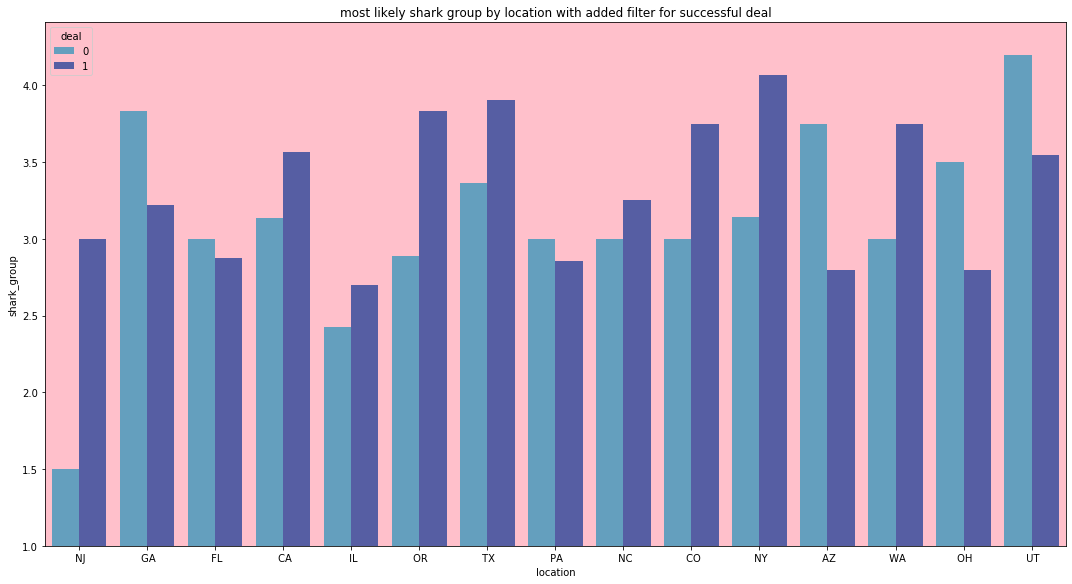

In [44]:
with sns.axes_style({'axes.facecolor':'pink'}):
    with sns.color_palette('icefire'):
        plt.figure(figsize=(15,8))
        sns.barplot(location_df.location,location_df.shark_group,hue=location_df.deal,ci=None)
        plt.tight_layout()
        plt.ylim(1,)
        plt.title('most likely shark group by location with added filter for successful deal')
        plt.show()

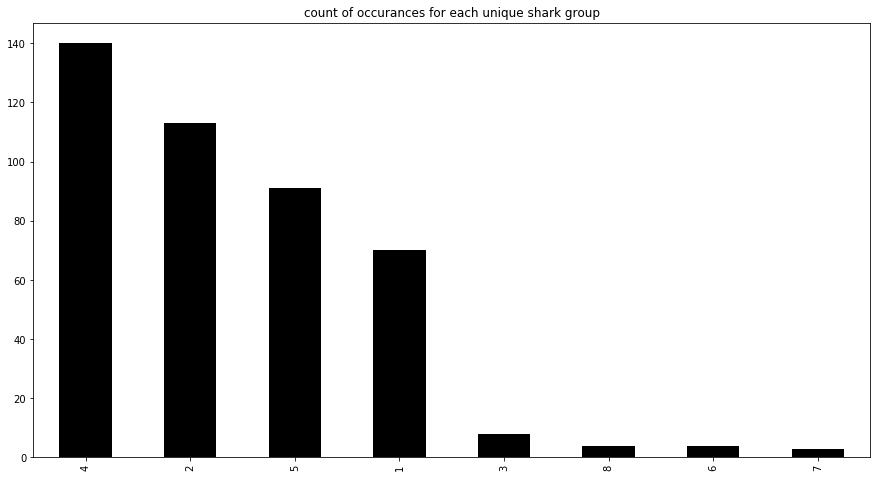

In [45]:
plt.figure(figsize=(15,8))
df.shark_group.value_counts().plot(kind='bar',color='k')
plt.title('count of occurances for each unique shark group')
plt.show()

In [46]:
top_cat_df[['location','category']].head()

location             category
0       MN            Novelties
1       NJ       Specialty Food
2       GA  Baby and Child Care
3       FL    Consumer Services
4       CA       Specialty Food

In [47]:
loc_dfs=[]
for l in top_cat_df.location.unique():
    loc_dfs.append(top_cat_df[['location','category']][top_cat_df[['location','category']].location==l])

In [48]:
all_dfs = []
for l in df.location.unique():
    all_dfs.append(df[['location','category']][df[['location','category']].location==l])    

In [49]:
loc_dfs[1]

location                           category
1         NJ                     Specialty Food
46        NJ  Baby and Children's Entertainment
189       NJ                          Novelties
195       NJ                          Novelties
198       NJ                         Automotive
257       NJ              Professional Services

In [50]:
for f in loc_dfs:
    print(f.location.unique())
    print(f.category.value_counts())
    print('-'*50)

[' MN']
Novelties            1
Specialty Food       1
Consumer Services    1
Electronics          1
Name: category, dtype: int64
--------------------------------------------------
[' NJ']
Novelties                            2
Specialty Food                       1
Baby and Children's Entertainment    1
Automotive                           1
Professional Services                1
Name: category, dtype: int64
--------------------------------------------------
[' GA']
Baby and Child Care    6
Specialty Food         1
Consumer Services      1
Automotive             1
Name: category, dtype: int64
--------------------------------------------------
[' FL']
Toys and Games                       3
Novelties                            3
Specialty Food                       2
Personal Care and Cosmetics          2
Online Services                      1
Outdoor Recreation                   1
Men and Women's Apparel              1
Kitchen Tools                        1
Pet Products                 

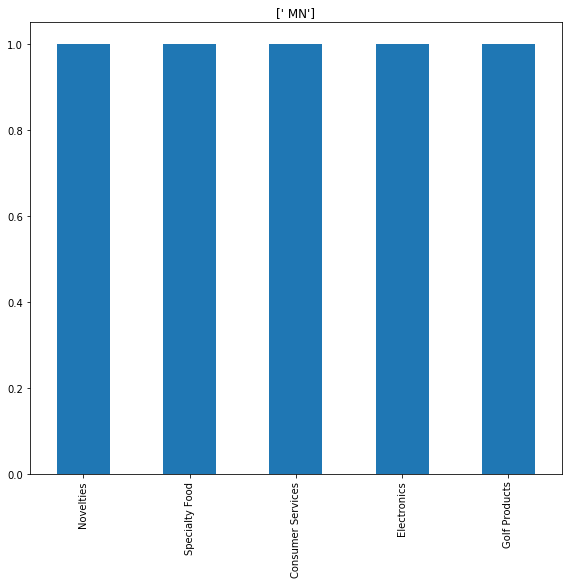

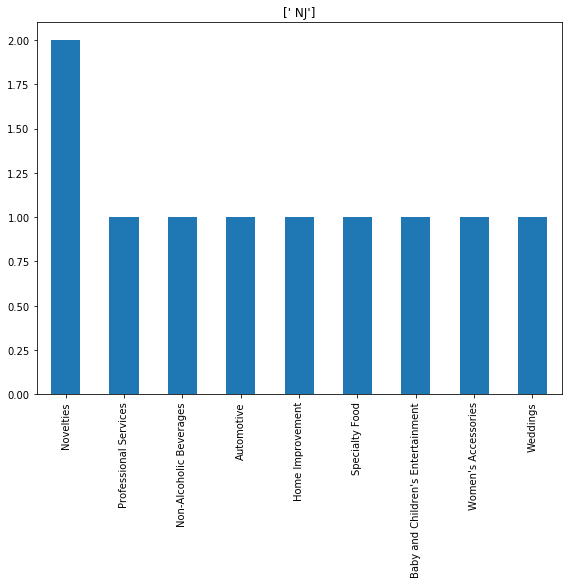

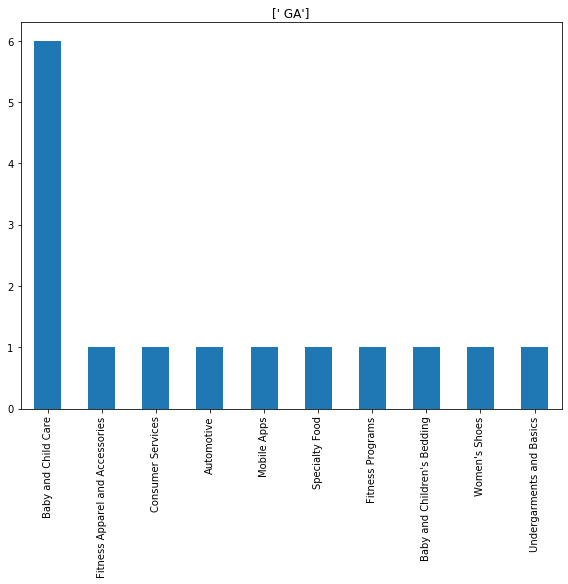

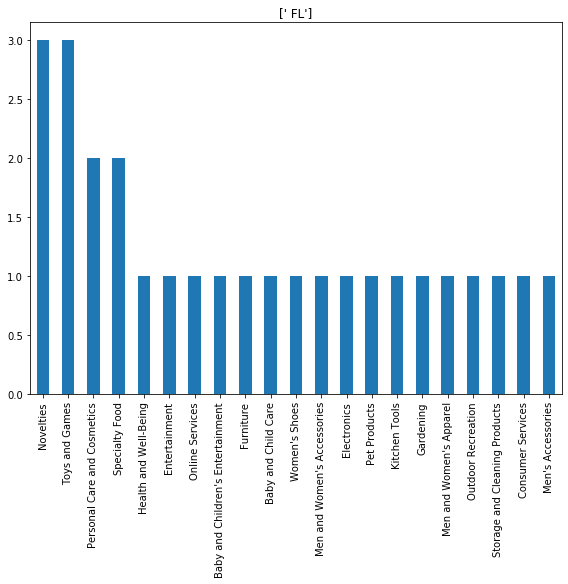

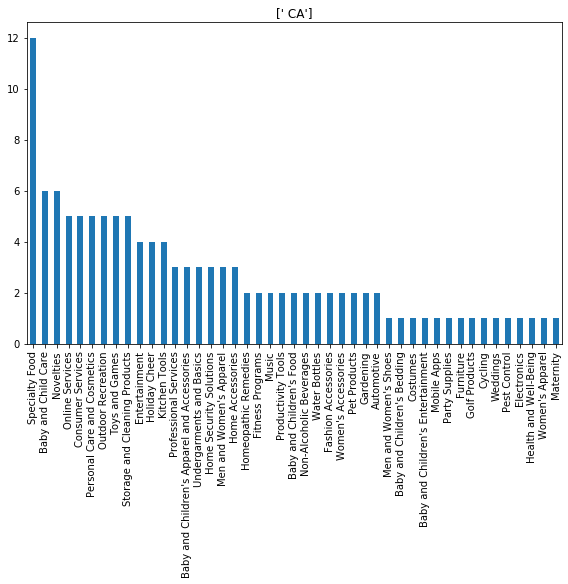

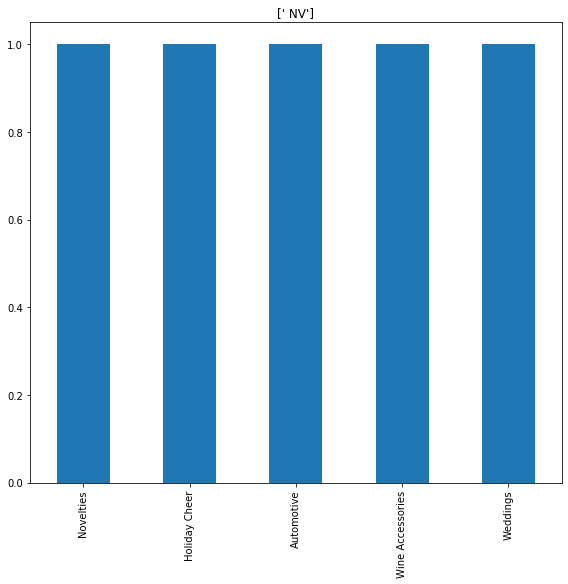

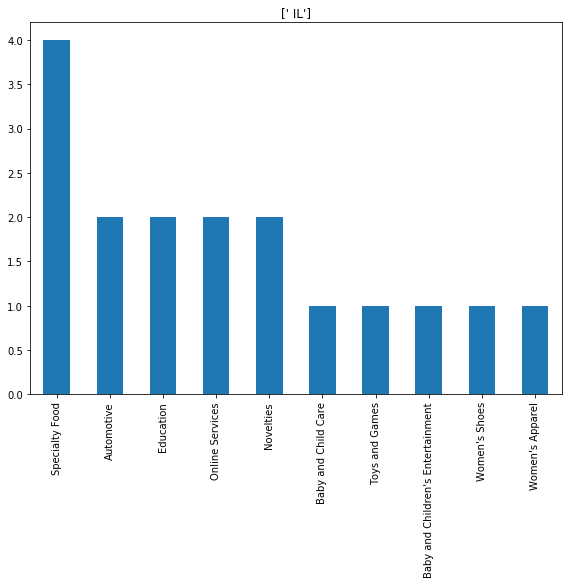

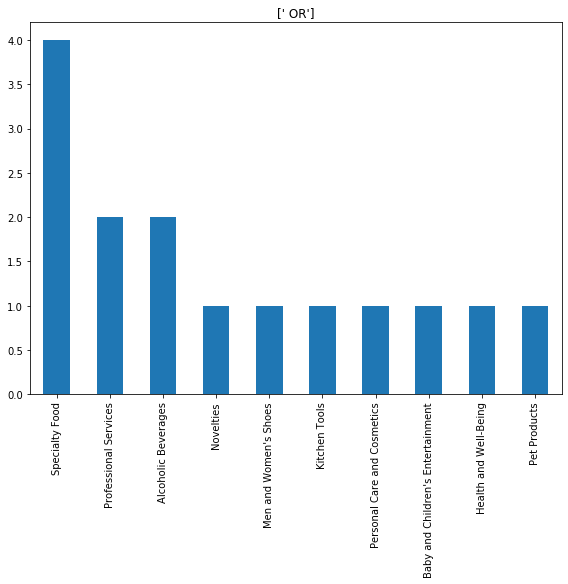

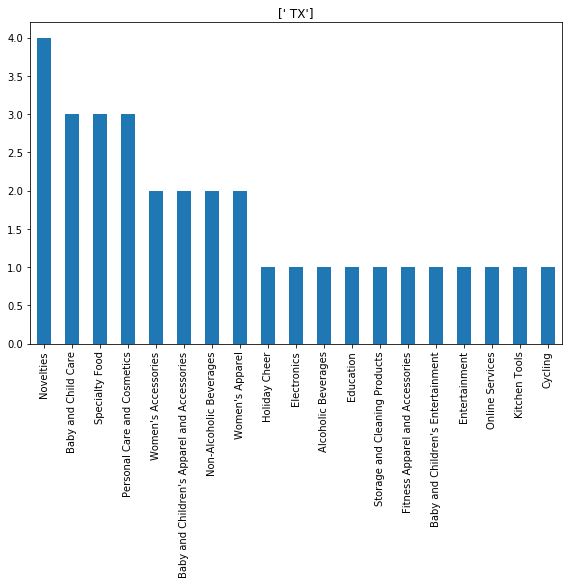

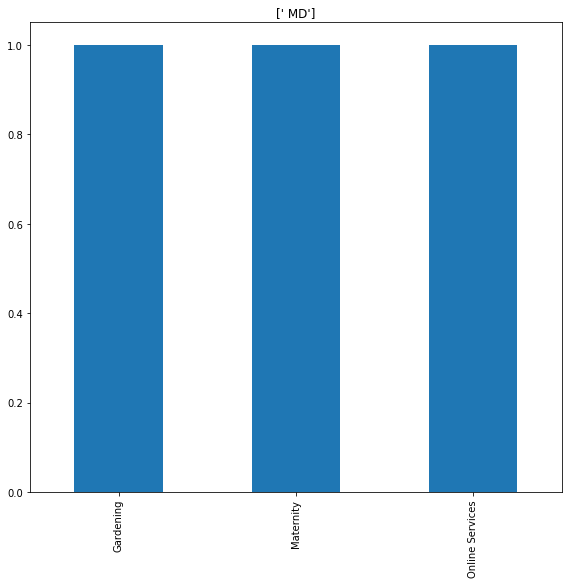

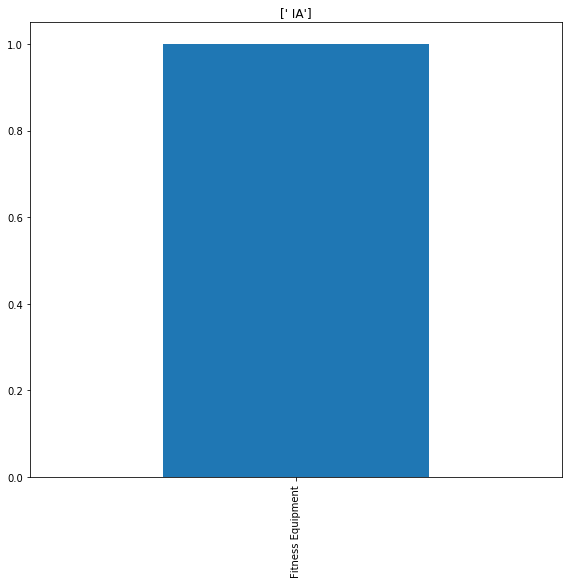

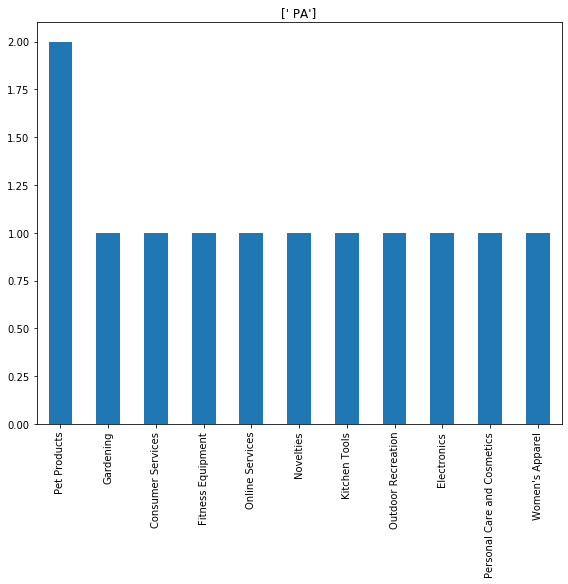

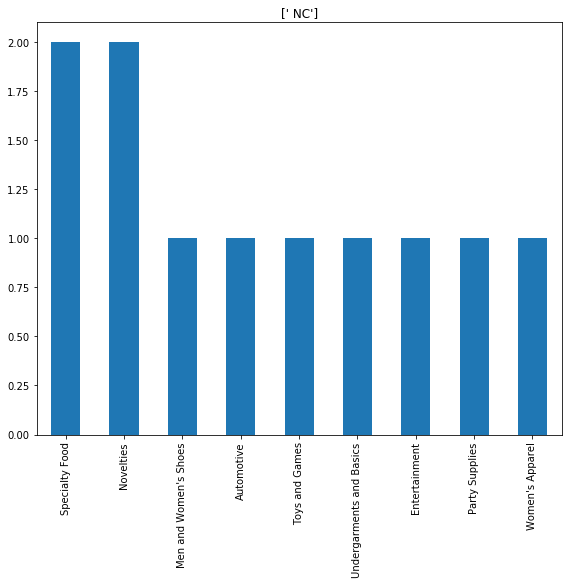

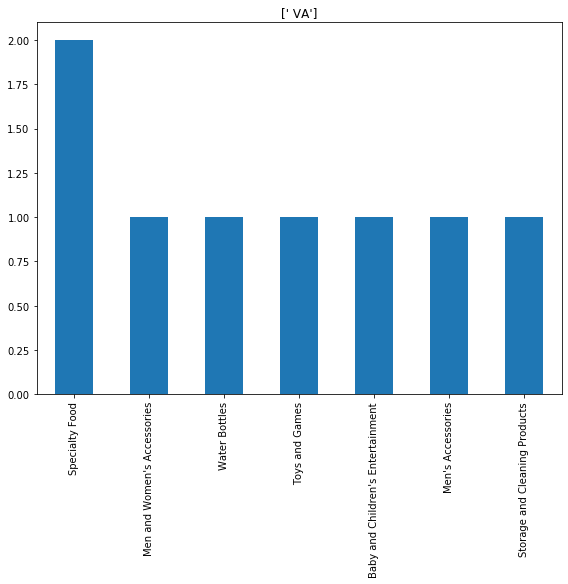

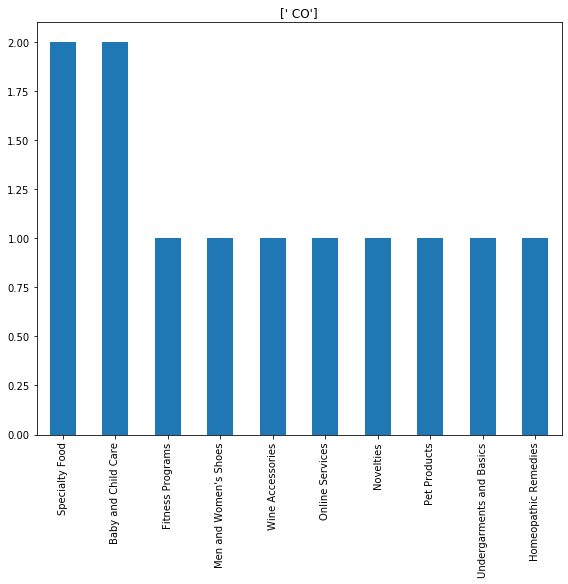

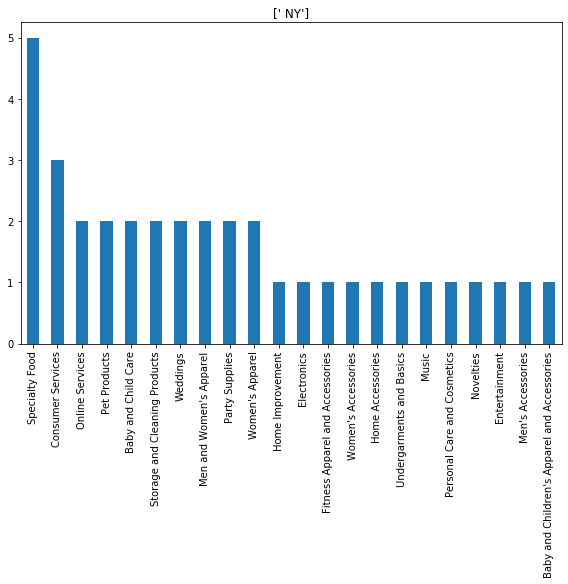

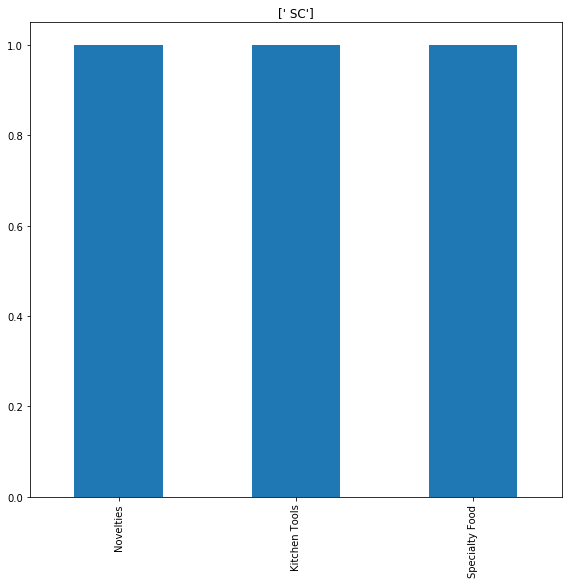

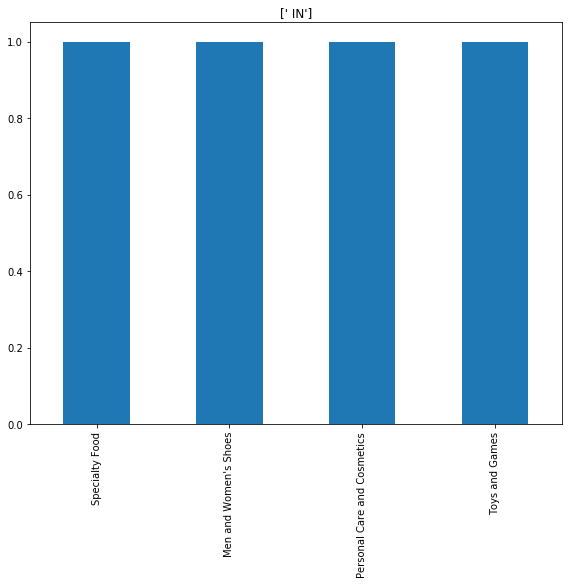

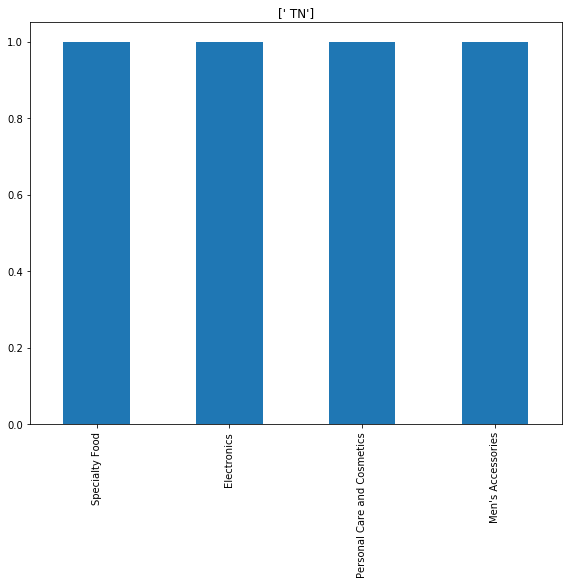

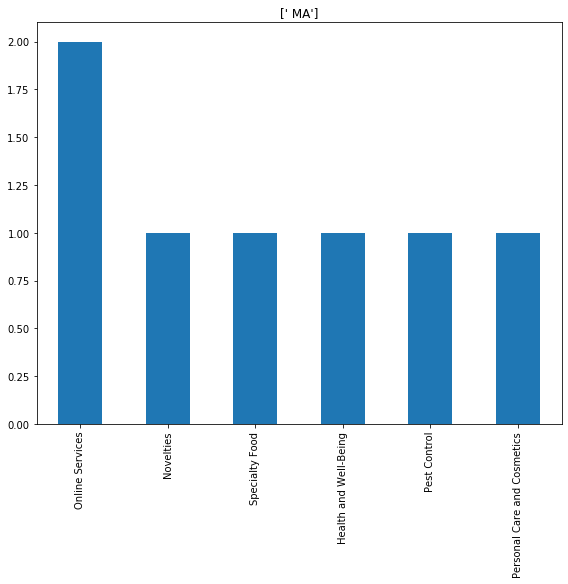

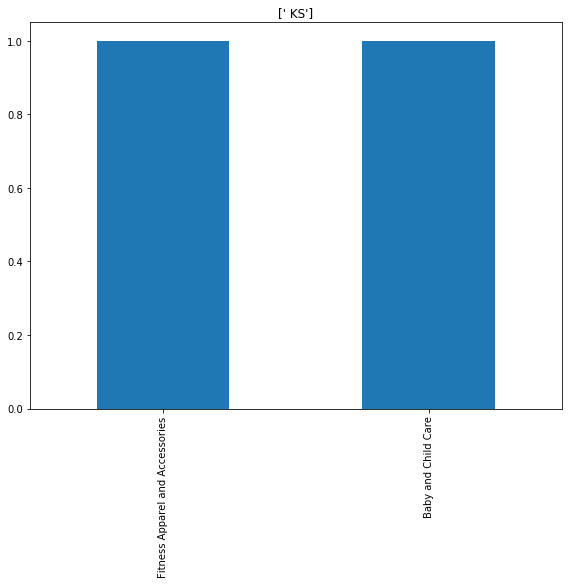

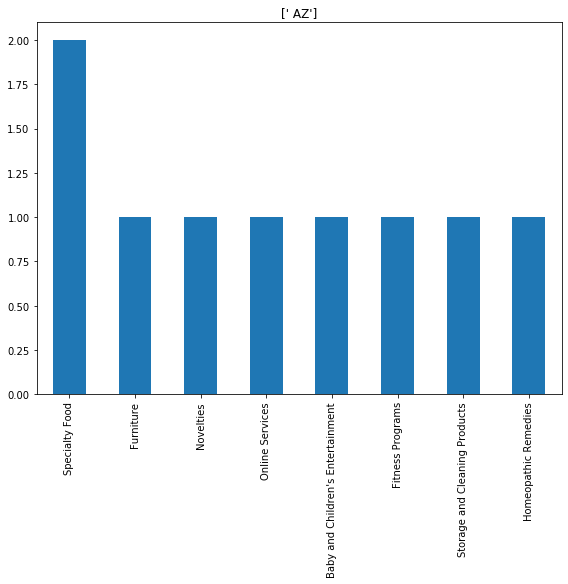

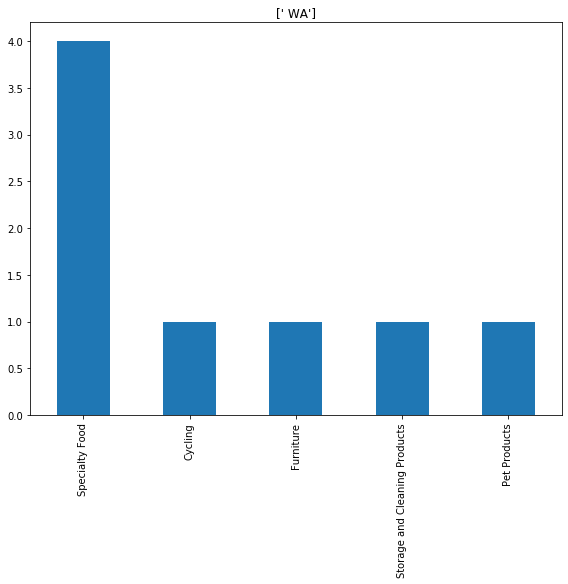

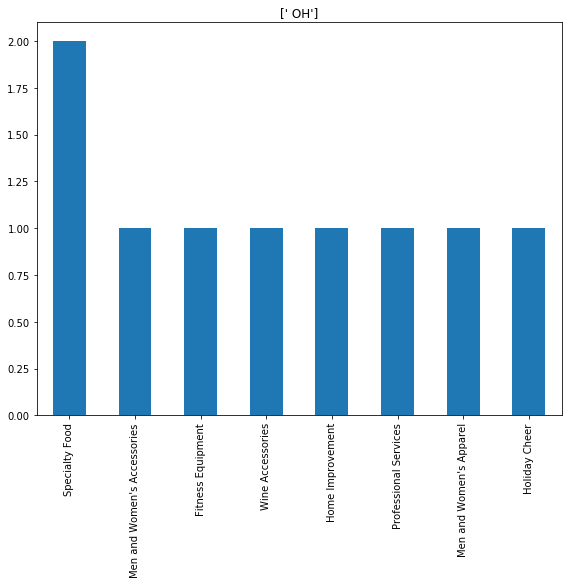

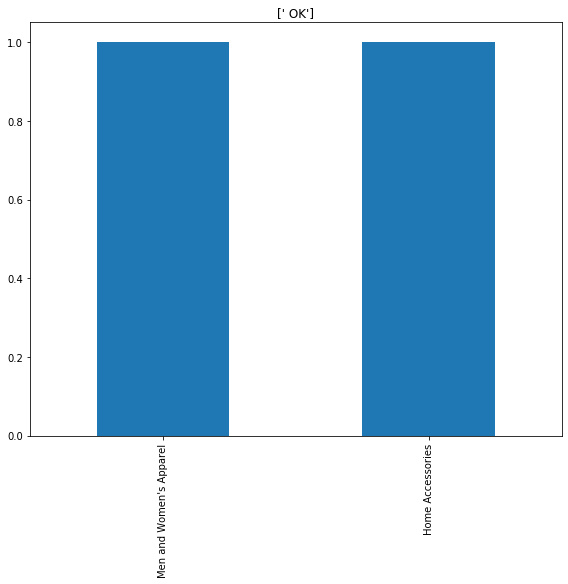

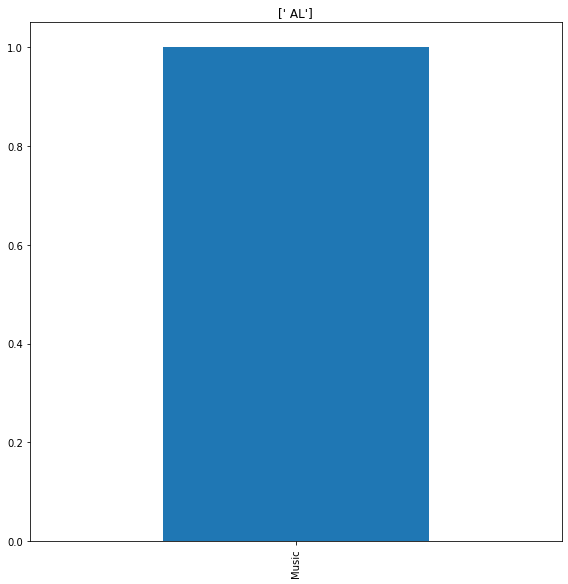

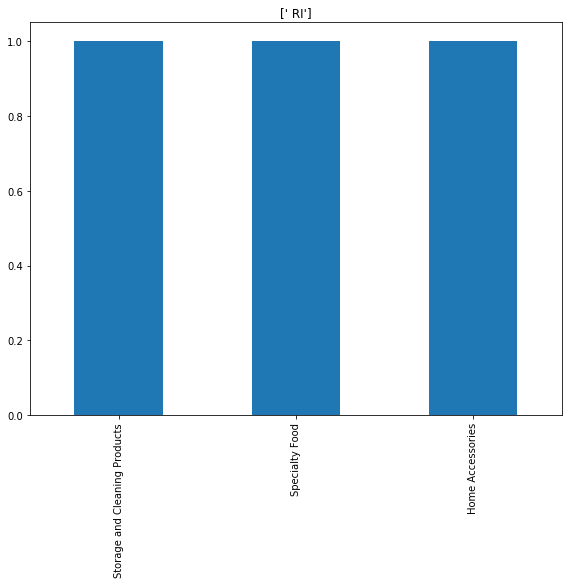

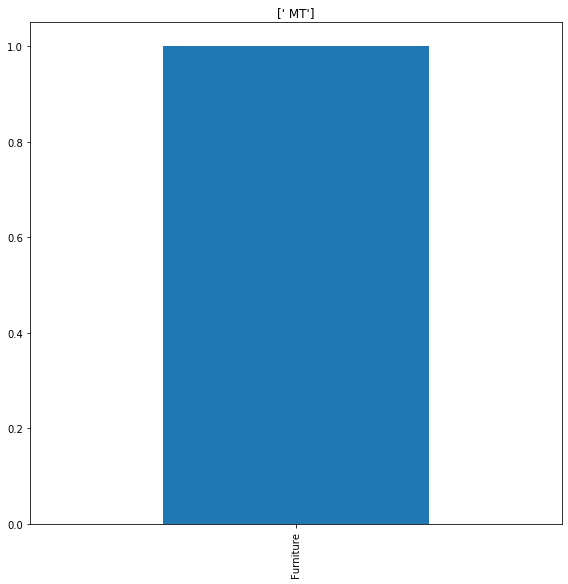

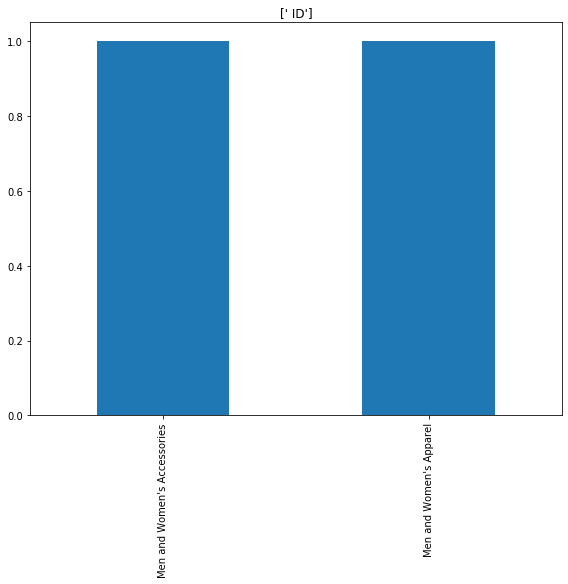

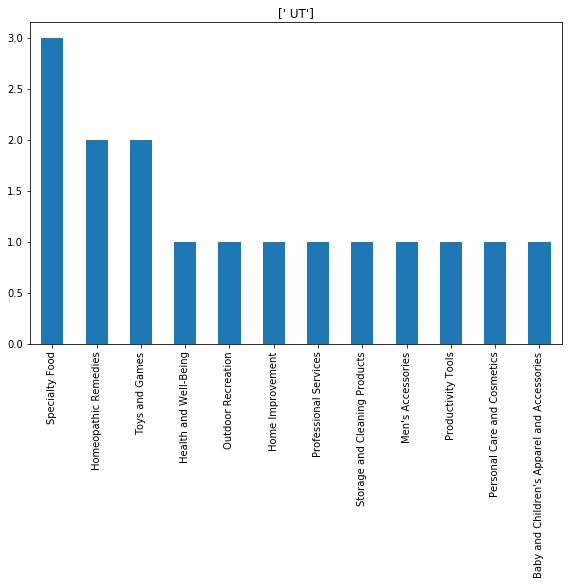

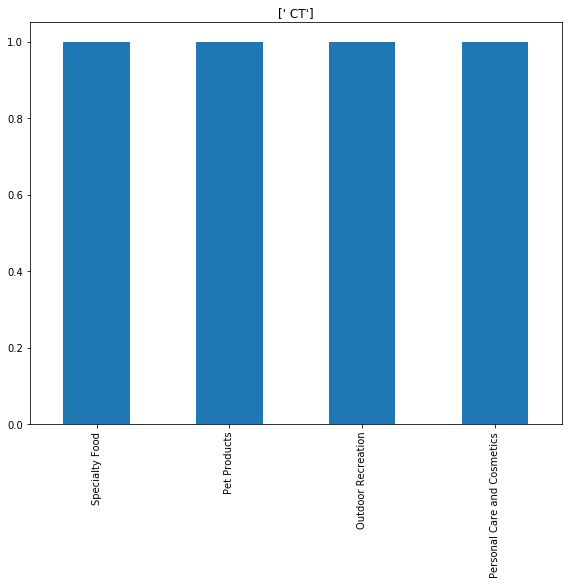

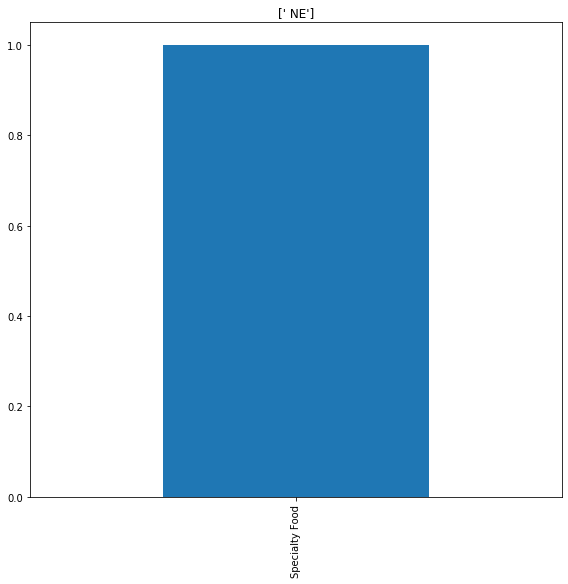

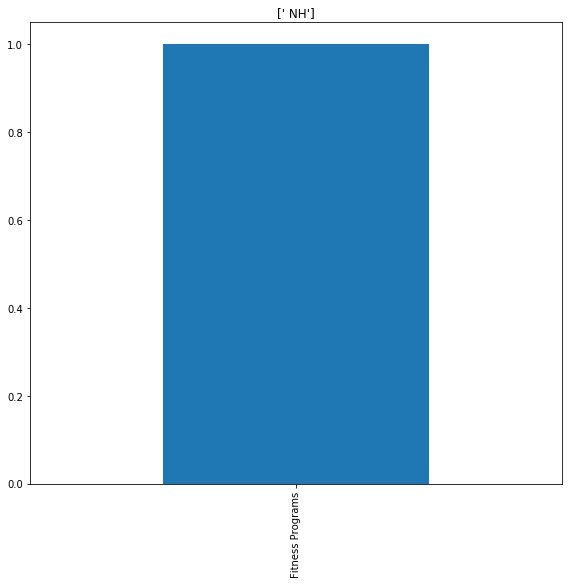

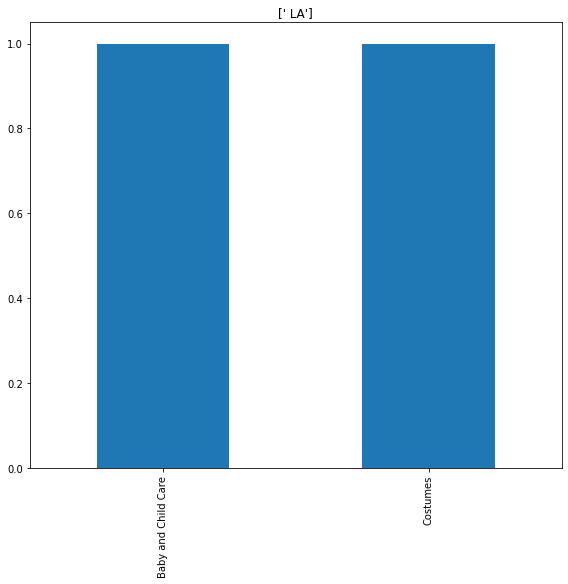

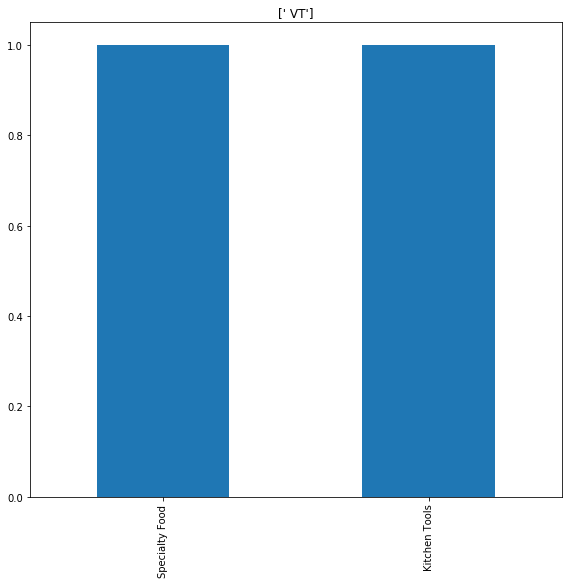

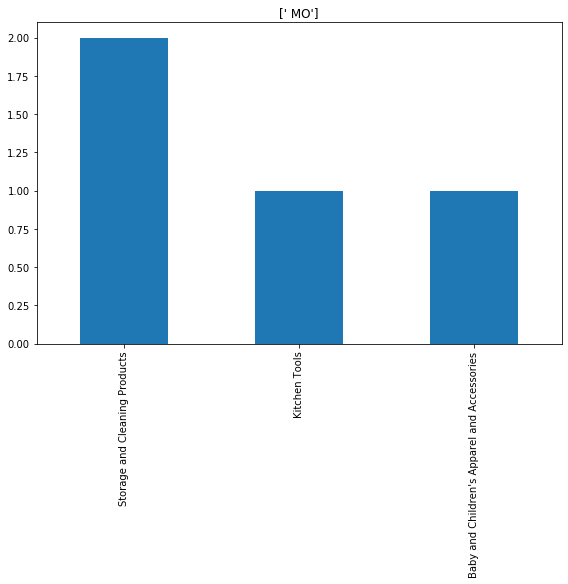

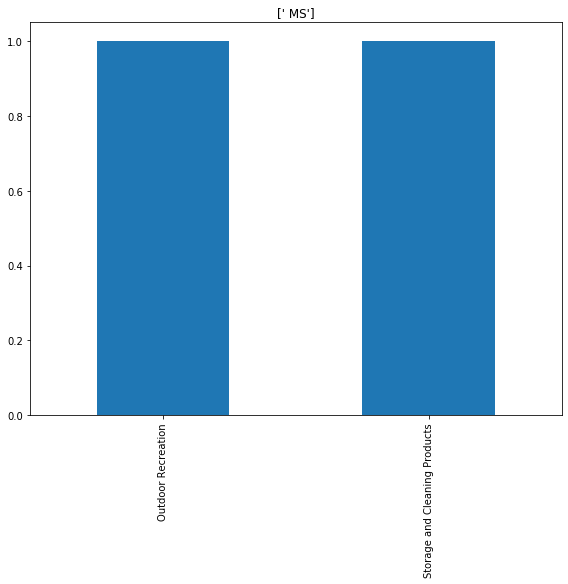

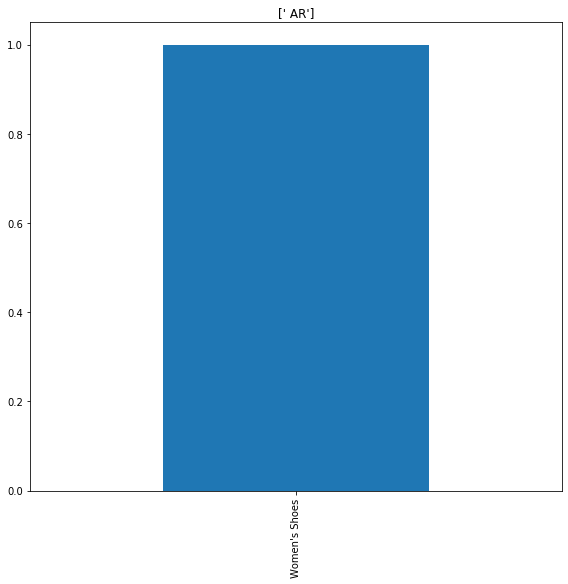

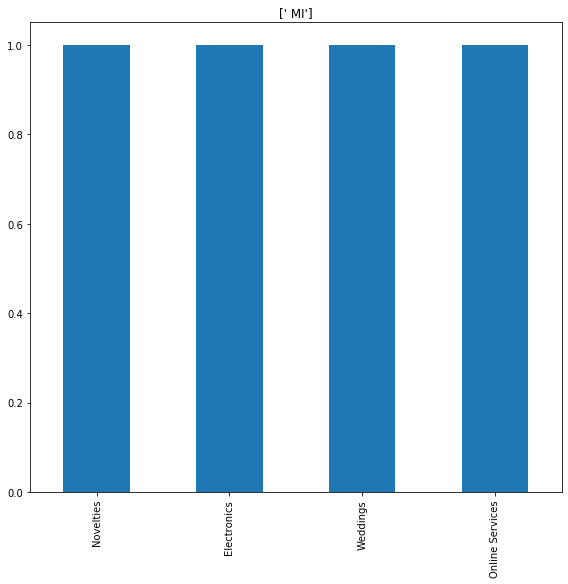

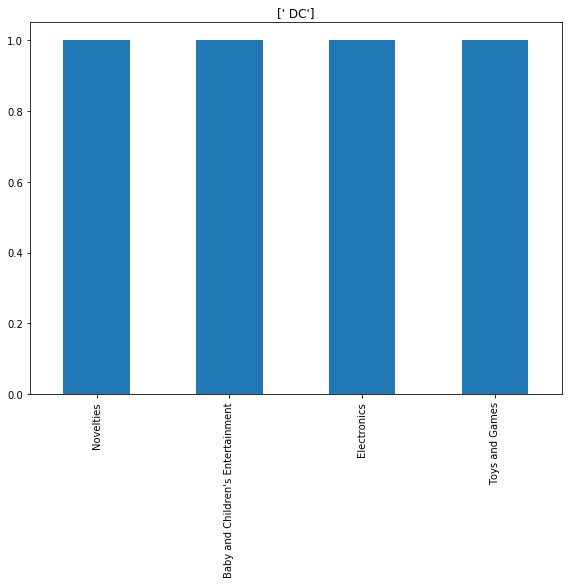

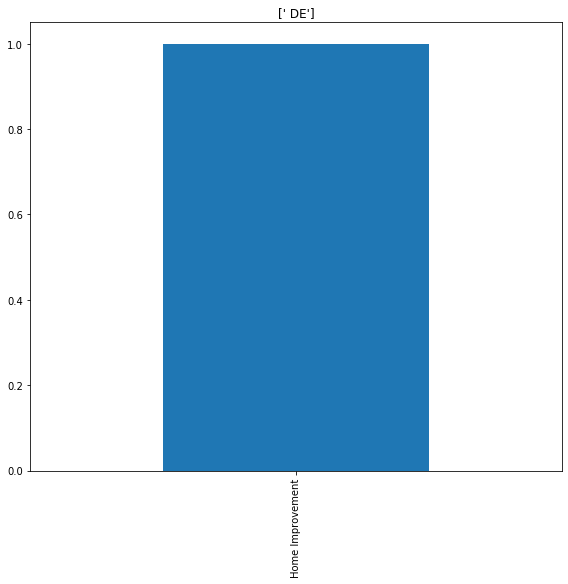

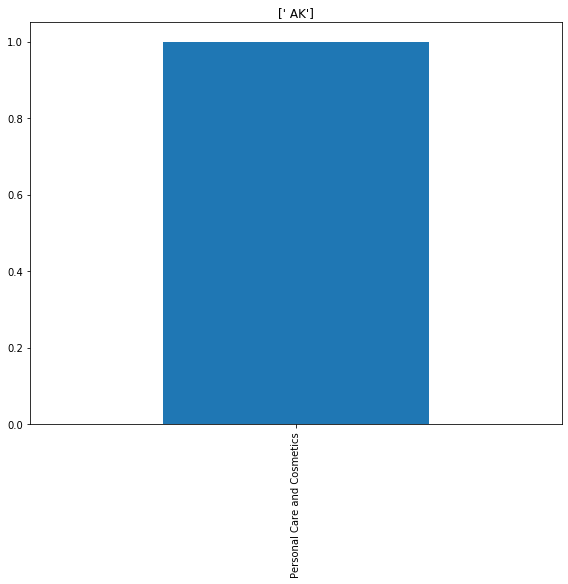

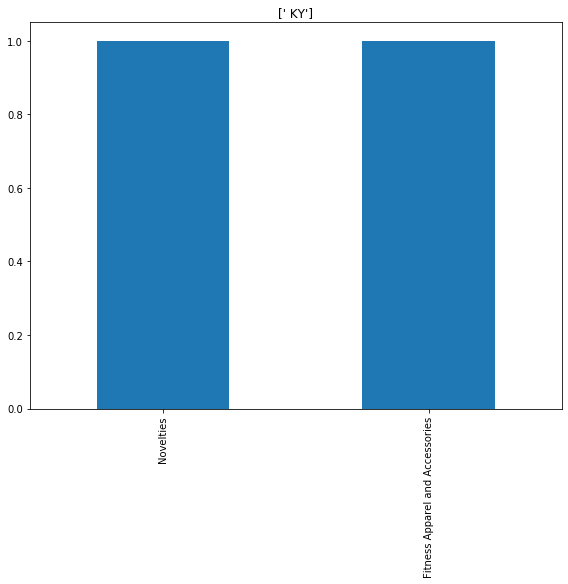

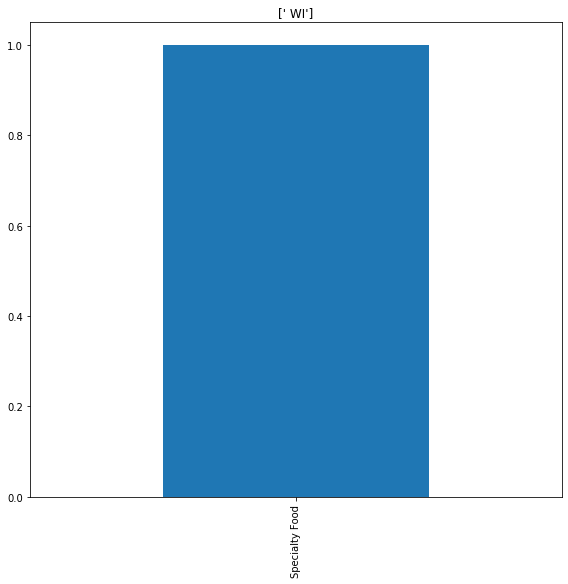

In [51]:
i=0

for f in all_dfs:

    plt.figure(figsize=(15,8))
    
    f.category.value_counts().plot(kind='bar',figsize=(8,8))
        
    plt.tight_layout()
    
    plt.title(f.location.unique())
    
    i = i + 1

    plt.show()

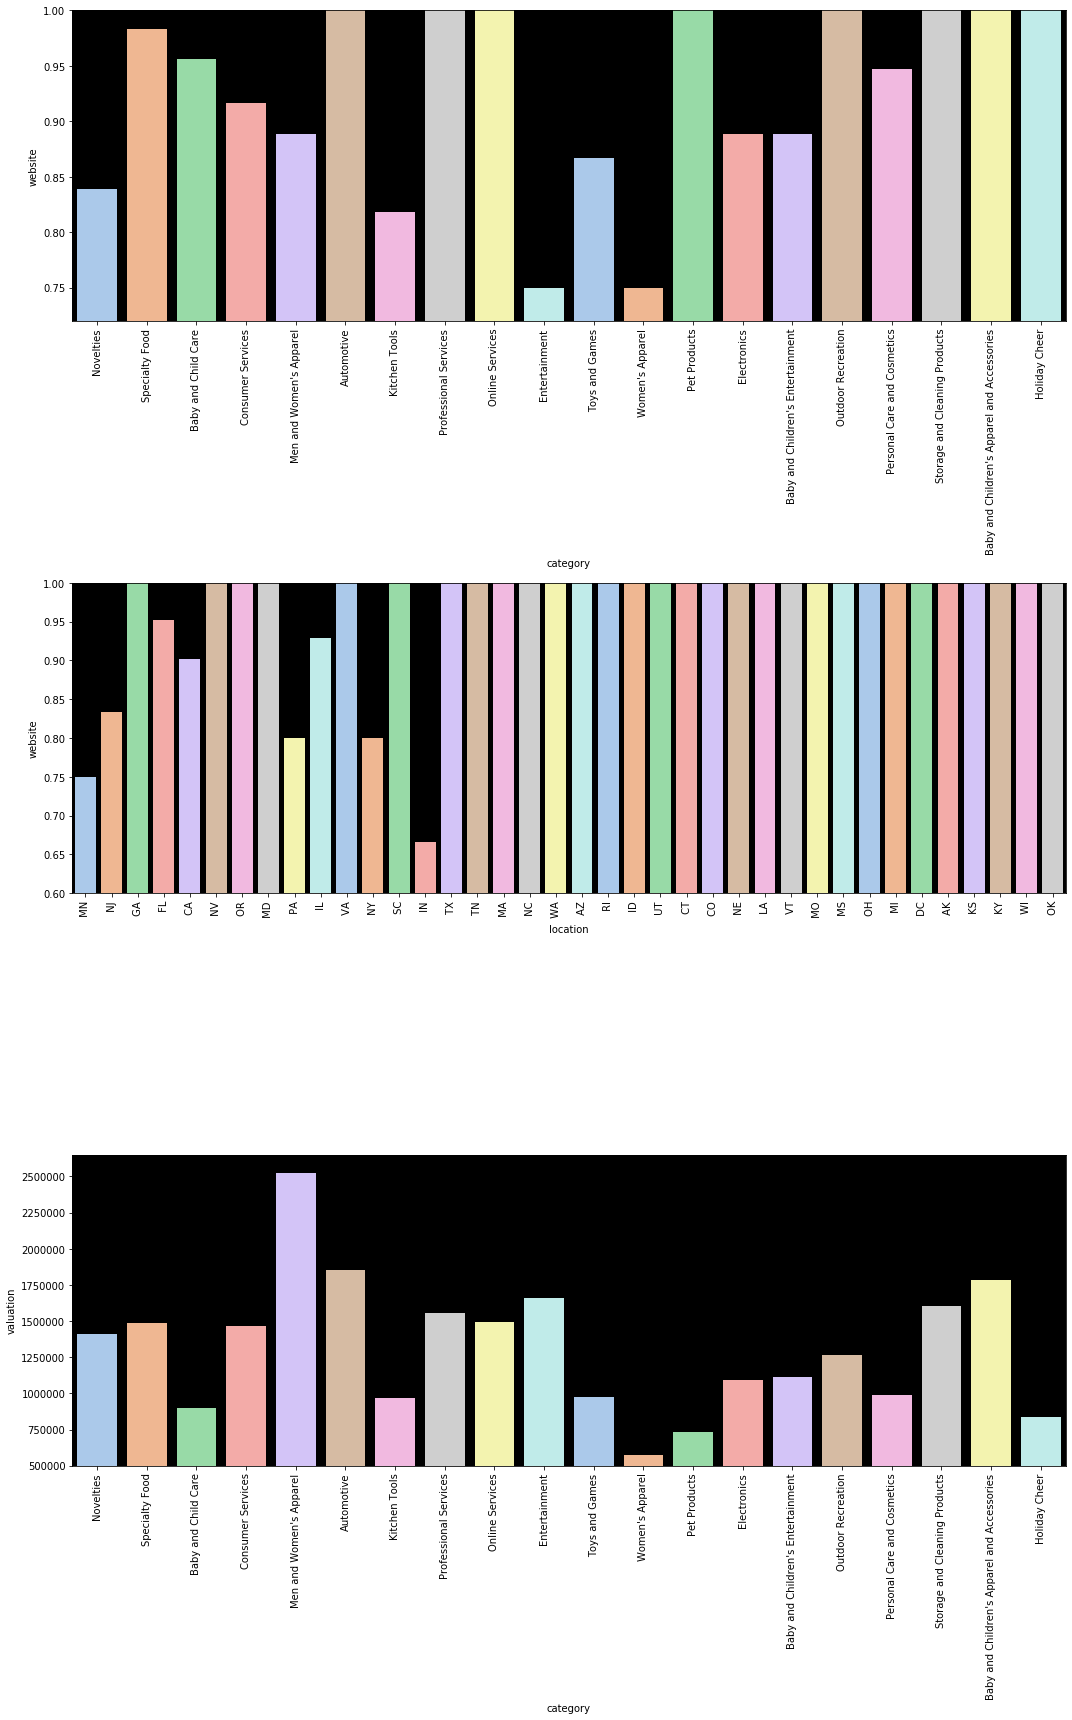

In [75]:
with sns.axes_style({'axes.facecolor':'black'}):

    plt.figure(figsize=(15,24))

    plt.subplot(3,1,1)
    sns.barplot(top_cat_df.category,top_cat_df.website,palette='pastel',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(0.72,1)
    plt.tight_layout()
    
    plt.subplot(3,1,2)
    sns.barplot(top_cat_df.location,top_cat_df.website,palette='pastel',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(0.6,1)
    plt.tight_layout()
    
    plt.subplot(3,1,3)
    sns.barplot(top_cat_df.category,top_cat_df.valuation,palette='pastel',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(500000)
    plt.tight_layout()

    plt.show()

In [54]:
shark_groups=[]
for group in df.shark_group.unique():
    shark_groups.append(df[df.shark_group==group])

In [55]:
shark_groups[0]

description             category  \
0              Bluetooth device implant for your ear.            Novelties   
1   Retail and wholesale pie factory with two reta...       Specialty Food   
2   Ava the Elephant is a godsend for frazzled par...  Baby and Child Care   
3   Organizing, packing, and moving services deliv...    Consumer Services   
4   One of the first entrepreneurs to pitch on Sha...       Specialty Food   
..                                                ...                  ...   
77  Cakes made from scratch from family recipes. T...       Specialty Food   
78        Designer hospital gowns for expecting moms.            Maternity   
86  The patented CitiKitty Cat Toilet Training Kit...         Pet Products   
87  T-shirts for expectant moms that display the d...      Women's Apparel   
88  Shoes with interchangeable uppers allowing the...        Women's Shoes   

                  entrepreneurs location  website website_length  \
0                Darrin Johnson       MN        0          short   
1                    Tod Wilson       NJ        1          short   
2               Tiffany Krumins       GA        1         medium   
3   Nick Friedman, Omar Soliman       FL        1         medium   
4                   Susan Knapp       CA        1         medium   
..                          ...      ...      ...            ...   
77                   Kim Nelson       SC        1         medium   
78               Deidrea Haysel       MD        1         medium   
86              Rebecca Rescate       PA        1         medium   
87                    Kim Preis       IL        0          short   
88    Dominique McClain Barteet       FL        1         medium   

              shark1           shark2         shark3        shark4  ... deal  \
0   Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    0   
1   Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   
2   Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   
3   Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    0   
4   Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   
..               ...              ...            ...           ...  ...  ...   
77  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   
78  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    0   
86  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   
87  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    0   
88  Barbara Corcoran  Robert Herjavec  Kevin O'Leary  Daymond John  ...    1   

   episode  askedFor exchangeForStake valuation  season  \
0        1   1000000               15   6666667       1   
1        1    460000               10   4600000       1   
2        1     50000               15    333333       1   
3        1    250000               25   1000000       1   
4        2    500000               15   3333333       1   
..     ...       ...              ...       ...     ...   
77       6     50000               25    200000       2   
78       6     30000               20    150000       2   
86       9    100000               15    666667       2   
87       9     50000               15    333333       2   
88       9    500000               20   2500000       2   

    Multiple_Entreprenuers  askedFor_bin  exchangeForStake_bin  valuation_bin  
0                        0             2                     1              2  
1                        0             1                     0              1  
2                        0             0                     1              0  
3                        0             0                     2              0  
4                        0             1                     1              1  
..                     ...           ...                   ...            ...  
77                       0             0                  

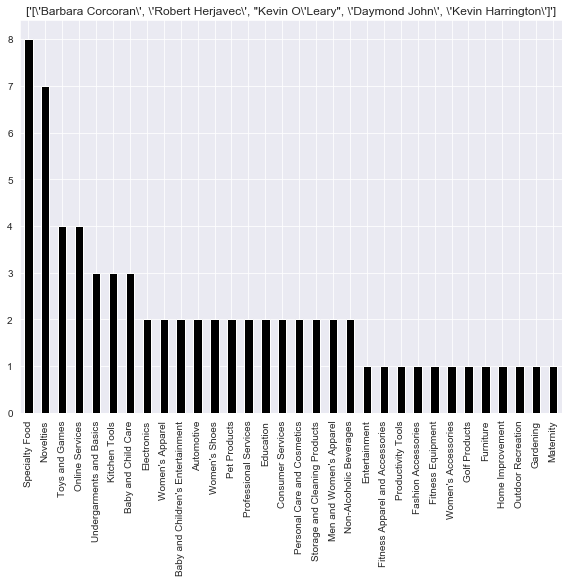

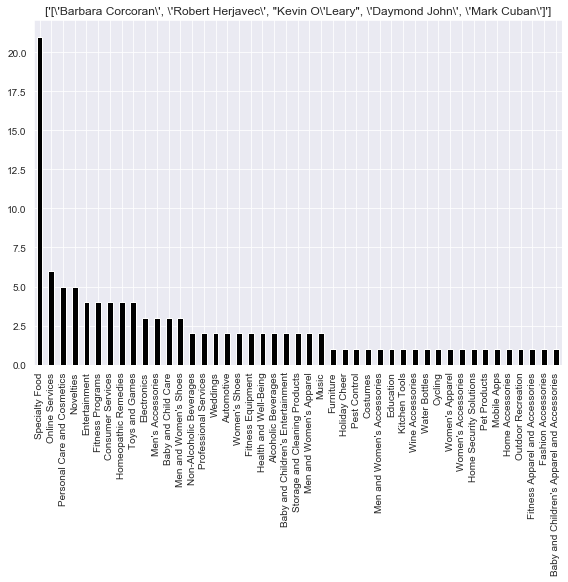

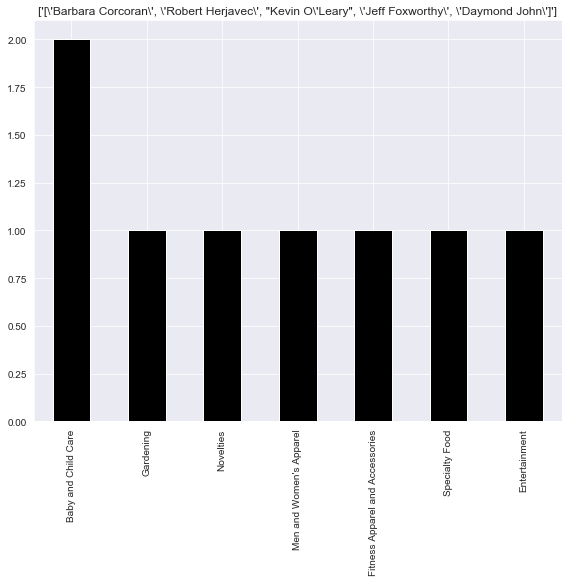

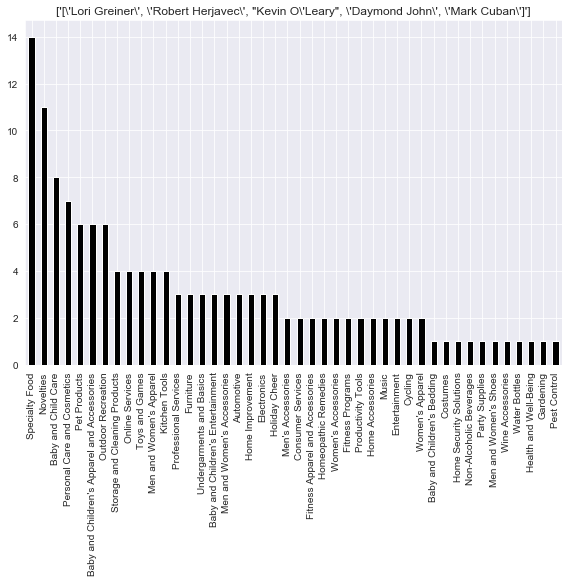

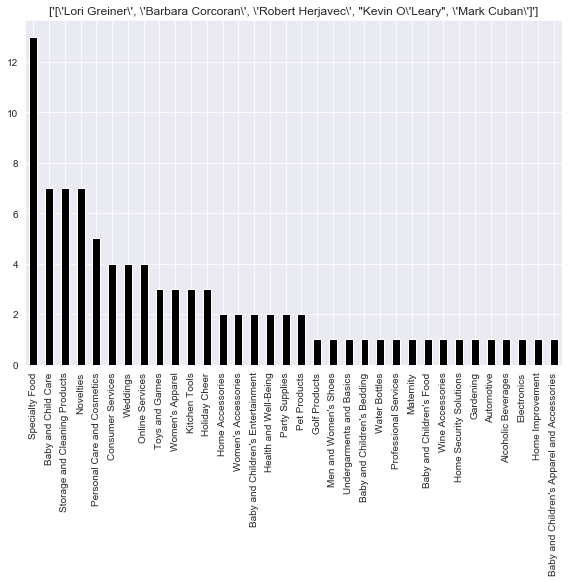

In [77]:
with sns.axes_style('darkgrid'):

    i=0

    for f in shark_groups[0:5]:

        plt.figure(figsize=(15,8))

        f.category.value_counts().plot(kind='bar',figsize=(8,8),color='k')

        plt.tight_layout()

        plt.title(f.sharks.unique())

        i = i + 1

        plt.show()

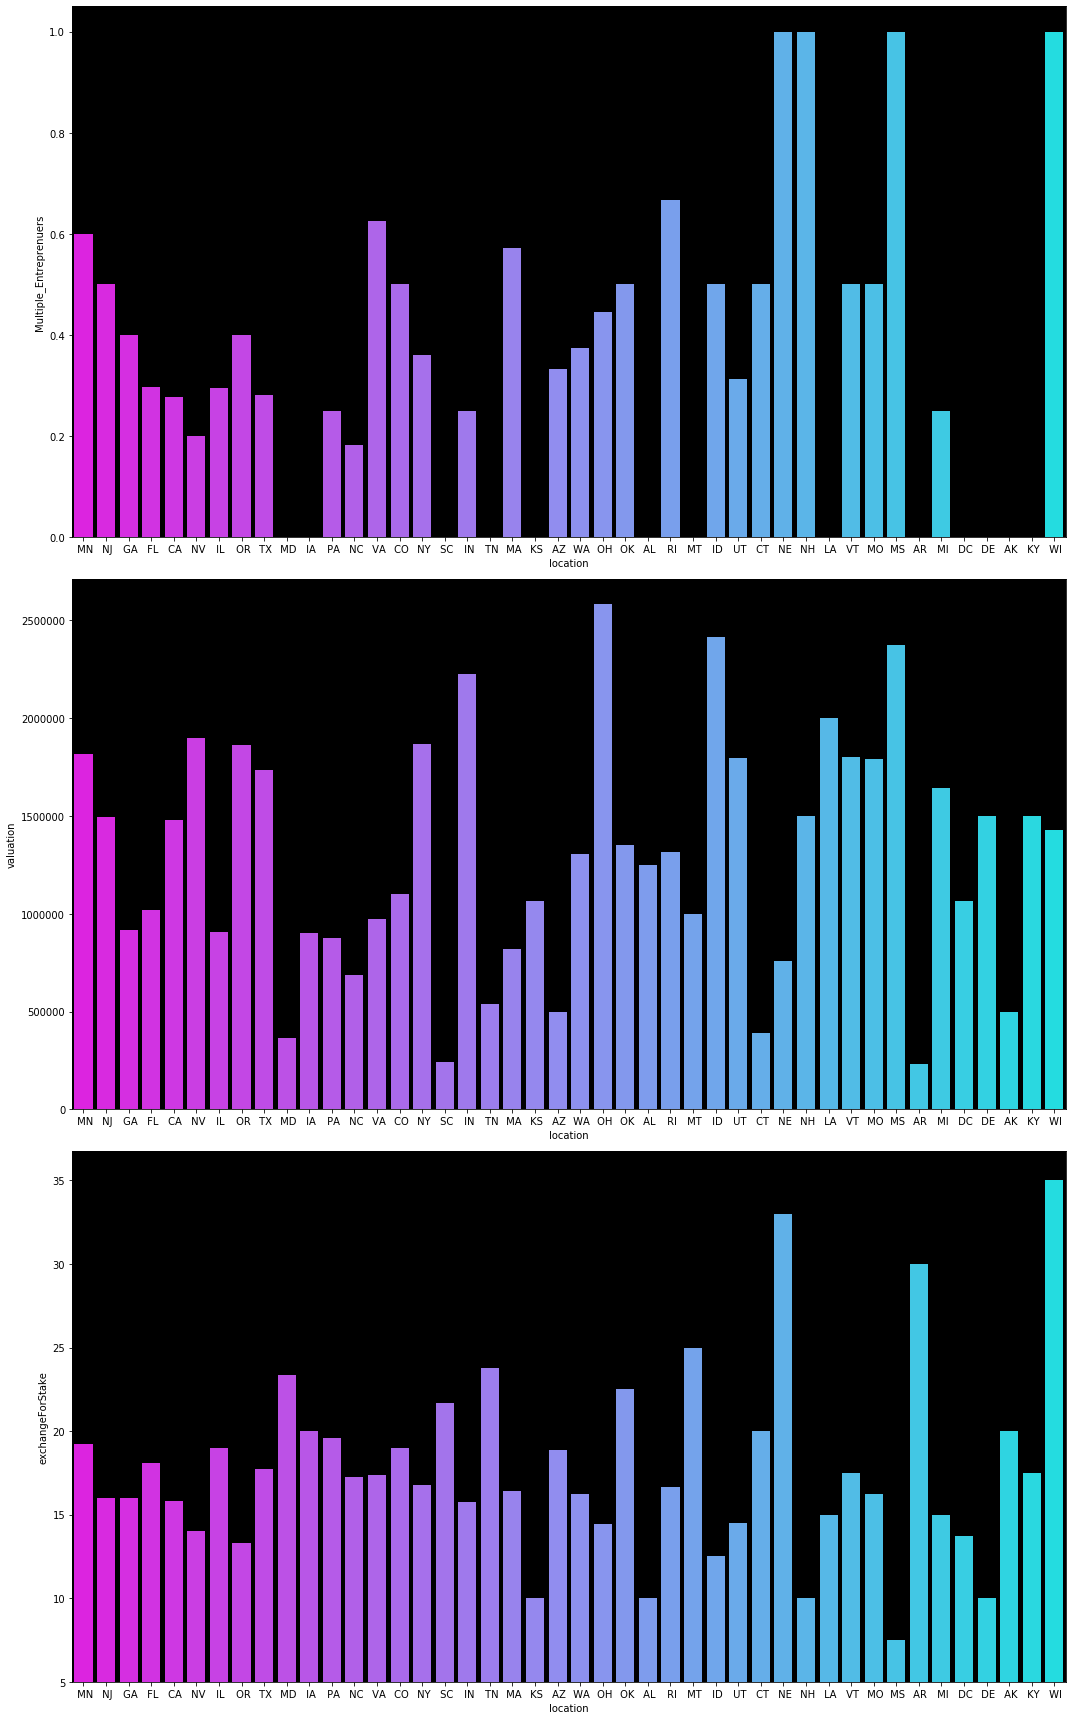

In [89]:
with sns.axes_style({'axes.facecolor':'k'}):

    plt.figure(figsize=(15,24))

    plt.subplot(3,1,1)
    sns.barplot(df.location,df.Multiple_Entreprenuers,ci=None,palette='cool_r')
    plt.tight_layout()
    
    plt.subplot(3,1,2)
    sns.barplot(df.location,df.valuation,ci=None,palette='cool_r')
    plt.tight_layout()

    plt.subplot(3,1,3)
    sns.barplot(df.location,df.exchangeForStake,ci=None,palette='cool_r')
    plt.ylim(5)
    plt.tight_layout()
    
    plt.show()